# Accidents in Zürich in the light of weather in 2019

This analysis is prepared for the Health Data Challenge course at the University on Lucerne FS2023 by Mercédesz Lehoczky.

The research questions are the following:

- Do weather conditions have an impact on when road accidents happen?
- Do accidents happen more often on weekends or on holidays?
- Do accidents happen more often during rush hours?


The data are available online:


City of Zürich accident data:
https://opendata.swiss/en/dataset/polizeilich-registrierte-verkehrsunfalle-auf-dem-stadtgebiet-zurich-seit-2011


Hourly Zürich city weather data:
https://opendata.swiss/en/dataset/stundlich-aktualisierte-meteodaten-seit-1992


In [188]:
import pandas as pd
import numpy as np
import datetime
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
# Enlarge output display capacity
pd.set_option('display.max_rows', 500)

# Set the display option to show all columns
pd.set_option('display.max_columns', None)

## Zürich city accidents dataset

In [4]:
# Import Zürich city accidents dataset
accidents = pd.read_csv('../data/RoadTrafficAccidentLocations.csv', header = 0)

### Overview of data types and structure

In [5]:
# View an instance
accidents.loc[34649, :]

AccidentUID                    7F14F57457377D48E05328B9D80AA62A
AccidentType                                                at2
AccidentType_de                                   Auffahrunfall
AccidentType_fr                       accident par tamponnement
AccidentType_it                       Incidente di tamponamento
AccidentType_en                Accident with rear-end collision
AccidentSeverityCategory                                    as4
AccidentSeverityCategory_de              Unfall mit Sachschaden
AccidentSeverityCategory_fr    accident avec dommages matériels
AccidentSeverityCategory_it       Incidente con danni materiali
AccidentSeverityCategory_en       Accident with property damage
AccidentInvolvingPedestrian                               False
AccidentInvolvingBicycle                                  False
AccidentInvolvingMotorcycle                               False
RoadType                                                  rt432
RoadType_de                             

In [6]:
# Drop duplicate columns, only keep English ones
accidents = accidents.drop(columns = ['AccidentType_de', 'AccidentType_fr', 'AccidentType_it', 
                      'AccidentSeverityCategory_de', 'AccidentSeverityCategory_fr', 'AccidentSeverityCategory_it',
                      'RoadType_de', 'RoadType_fr', 'RoadType_it',
                      'AccidentMonth_de', 'AccidentMonth_fr', 'AccidentMonth_it',
                      'AccidentWeekDay_de', 'AccidentWeekDay_fr', 'AccidentWeekDay_it'])

In [7]:
# View datatypes 
accidents.dtypes

AccidentUID                    object
AccidentType                   object
AccidentType_en                object
AccidentSeverityCategory       object
AccidentSeverityCategory_en    object
AccidentInvolvingPedestrian      bool
AccidentInvolvingBicycle         bool
AccidentInvolvingMotorcycle      bool
RoadType                       object
RoadType_en                    object
AccidentLocation_CHLV95_E       int64
AccidentLocation_CHLV95_N       int64
CantonCode                     object
MunicipalityCode                int64
AccidentYear                    int64
AccidentMonth                   int64
AccidentMonth_en               object
AccidentWeekDay                object
AccidentWeekDay_en             object
AccidentHour                    int64
AccidentHour_text              object
dtype: object

#### View date structure

In [8]:
print(accidents['AccidentWeekDay'].unique())

['aw406' 'aw407' 'aw401' 'aw402' 'aw403' 'aw404' 'aw405']


In [9]:
print(accidents['AccidentHour'].unique())

[ 0  1  2  3  4  5 13 15 16 18 20 14 21  7  8  9 10 19 11 12 17 23  6 22]


In [10]:
print(accidents['AccidentHour_text'].unique())

['00h-01h' '01h-02h' '02h-03h' '03h-04h' '04h-05h' '05h-06h' '13h-14h'
 '15h-16h' '16h-17h' '18h-19h' '20h-21h' '14h-15h' '21h-22h' '07h-08h'
 '08h-09h' '09h-10h' '10h-11h' '19h-20h' '11h-12h' '12h-13h' '17h-18h'
 '23h-00h' '06h-07h' '22h-23h']


In [11]:
accidents[['AccidentYear', 'AccidentMonth_en','AccidentWeekDay', 'AccidentWeekDay_en','AccidentHour_text']].head(20)

,AccidentYear,AccidentMonth_en,AccidentWeekDay,AccidentWeekDay_en,AccidentHour_text
0,2011,January,aw406,Saturday,00h-01h
1,2011,January,aw406,Saturday,01h-02h
2,2011,January,aw406,Saturday,02h-03h
3,2011,January,aw406,Saturday,02h-03h
4,2011,January,aw406,Saturday,03h-04h
5,2011,January,aw406,Saturday,04h-05h
6,2011,January,aw406,Saturday,04h-05h
7,2011,January,aw406,Saturday,05h-06h
8,2011,January,aw406,Saturday,13h-14h
9,2011,January,aw406,Saturday,15h-16h


In [13]:
accidents[['AccidentYear', 'AccidentMonth_en','AccidentWeekDay', 'AccidentWeekDay_en','AccidentHour_text']].tail(20)

,AccidentYear,AccidentMonth_en,AccidentWeekDay,AccidentWeekDay_en,AccidentHour_text
55806,2022,December,aw404,Thursday,12h-13h
55807,2022,December,aw404,Thursday,13h-14h
55808,2022,December,aw404,Thursday,15h-16h
55809,2022,December,aw404,Thursday,16h-17h
55810,2022,December,aw404,Thursday,18h-19h
55811,2022,December,aw404,Thursday,18h-19h
55812,2022,December,aw404,Thursday,22h-23h
55813,2022,December,aw405,Friday,06h-07h
55814,2022,December,aw405,Friday,10h-11h
55815,2022,December,aw405,Friday,14h-15h


The dataset has records from January 2011 until December 2022.

### Preprocessing

Only keep data in 2019

In [14]:
accidents = accidents[accidents.AccidentYear == 2019]

#### Fix date formats

##### Add missing day counter
'DayCount'

In [23]:
# Create new column for day count
accidents["DayCount"] = np.nan

# Reset indices             
accidents = accidents.reset_index(drop=True)           

# Initialise counter
count = 1    

# Loop though data and add day counter
for row in range(len(accidents.index)):
    accidents.at[row, 'DayCount'] = count   #Set first day as 1
    if row < len(accidents.index) - 1 and (accidents.at[row, 'AccidentWeekDay'] != accidents.at[row+1, 'AccidentWeekDay']): # If the days change
        count = count + 1 # Add to the counter (change the dates)
        accidents.at[row+1, 'DayCount'] = count  #Add counter as day counter
         

# Convert to int
accidents['DayCount'] = accidents['DayCount'].astype(int)

In [193]:
accidents

,AccidentUID,AccidentType,AccidentType_en,AccidentSeverityCategory,AccidentSeverityCategory_en,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,RoadType,RoadType_en,AccidentLocation_CHLV95_E,AccidentLocation_CHLV95_N,CantonCode,MunicipalityCode,AccidentYear,AccidentMonth,AccidentMonth_en,AccidentWeekDay,AccidentWeekDay_en,AccidentHour,AccidentHour_text,DayCount,Date,Datum
0,7F14F57457377D48E05328B9D80AA62A,at2,Accident with rear-end collision,as4,Accident with property damage,False,False,False,rt432,Principal road,2682306,1247037,ZH,261,2019,1,January,aw402,Tuesday,1,01h-02h,1,2019-01-01,2019-01-01T01:00+0100
1,7E8A0BAE5F9D9AACE05328B9D80ACFB0,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,False,False,rt433,Minor road,2682739,1247557,ZH,261,2019,1,January,aw402,Tuesday,1,01h-02h,1,2019-01-01,2019-01-01T01:00+0100
2,8133D764BE03EA54E05328B9D80A0E22,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,False,False,rt439,Other,2683731,1246631,ZH,261,2019,1,January,aw402,Tuesday,1,01h-02h,1,2019-01-01,2019-01-01T01:00+0100
3,7F7C471743CF9D3DE05328B9D80AF402,at2,Accident with rear-end collision,as3,Accident with light injuries,False,False,False,rt433,Minor road,2683678,1247601,ZH,261,2019,1,January,aw402,Tuesday,2,02h-03h,1,2019-01-01,2019-01-01T02:00+0100
4,841F44676EB00B9AE05328B9D80A33D9,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,False,False,rt432,Principal road,2682798,1244631,ZH,261,2019,1,January,aw402,Tuesday,3,03h-04h,1,2019-01-01,2019-01-01T03:00+0100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5523,9C3C1F77345A8844E05329B9D80AD873,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,True,True,rt433,Minor road,2683523,1247624,ZH,261,2019,12,December,aw402,Tuesday,12,12h-13h,365,2019-12-31,2019-12-31T12:00+0100
5524,9BFFA5036B8E43D0E05329B9D80A5306,at5,Accident when crossing the lane(s),as3,Accident with light injuries,False,True,False,rt433,Minor road,2681573,1247700,ZH,261,2019,12,December,aw402,Tuesday,18,18h-19h,365,2019-12-31,2019-12-31T18:00+0100
5525,9C02A2BD2D010300E05329B9D80A0600,at1,Accident when overtaking or changing lanes,as4,Accident with property damage,False,False,False,rt432,Principal road,2682276,1247052,ZH,261,2019,12,December,aw402,Tuesday,18,18h-19h,365,2019-12-31,2019-12-31T18:00+0100
5526,9C28072268B3BA4BE05329B9D80A67E4,at7,Accident when parking,as4,Accident with property damage,False,False,False,rt433,Minor road,2683004,1247184,ZH,261,2019,12,December,aw402,Tuesday,19,19h-20h,365,2019-12-31,2019-12-31T19:00+0100


##### Add dates with uniform format YYYY-MM-dd
'Date'

In [25]:
# Create new column
accidents['Date'] = np.nan

# Define function for conversion
def day_to_date(year, day_number):
    if calendar.isleap(year):
        days_in_year = 366
    else:
        days_in_year = 365
    if day_number < 1 or day_number > days_in_year:
        return None
    date = datetime.date.fromordinal(datetime.date(year, 1, 1).toordinal() + day_number - 1)
    return date

# Apply function and create Date YYYY-MM-dd
accidents['Date'] = accidents.apply(lambda row: day_to_date(row['AccidentYear'], row['DayCount']), axis=1)


##### Create matching date format with other dataset 
YYYY-MM-ddThh:00+01:00  
'Datum'

In [26]:
# Combine the date and hour columns into a new column
accidents['Datum'] = pd.to_datetime(accidents['Date']) + pd.to_timedelta(accidents['AccidentHour'], unit='h')
accidents['Datum'] = accidents['Datum'].dt.strftime('%Y-%m-%dT%H:00+0100')

View dataset

In [192]:
accidents

,AccidentUID,AccidentType,AccidentType_en,AccidentSeverityCategory,AccidentSeverityCategory_en,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,RoadType,RoadType_en,AccidentLocation_CHLV95_E,AccidentLocation_CHLV95_N,CantonCode,MunicipalityCode,AccidentYear,AccidentMonth,AccidentMonth_en,AccidentWeekDay,AccidentWeekDay_en,AccidentHour,AccidentHour_text,DayCount,Date,Datum
0,7F14F57457377D48E05328B9D80AA62A,at2,Accident with rear-end collision,as4,Accident with property damage,False,False,False,rt432,Principal road,2682306,1247037,ZH,261,2019,1,January,aw402,Tuesday,1,01h-02h,1,2019-01-01,2019-01-01T01:00+0100
1,7E8A0BAE5F9D9AACE05328B9D80ACFB0,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,False,False,rt433,Minor road,2682739,1247557,ZH,261,2019,1,January,aw402,Tuesday,1,01h-02h,1,2019-01-01,2019-01-01T01:00+0100
2,8133D764BE03EA54E05328B9D80A0E22,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,False,False,rt439,Other,2683731,1246631,ZH,261,2019,1,January,aw402,Tuesday,1,01h-02h,1,2019-01-01,2019-01-01T01:00+0100
3,7F7C471743CF9D3DE05328B9D80AF402,at2,Accident with rear-end collision,as3,Accident with light injuries,False,False,False,rt433,Minor road,2683678,1247601,ZH,261,2019,1,January,aw402,Tuesday,2,02h-03h,1,2019-01-01,2019-01-01T02:00+0100
4,841F44676EB00B9AE05328B9D80A33D9,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,False,False,rt432,Principal road,2682798,1244631,ZH,261,2019,1,January,aw402,Tuesday,3,03h-04h,1,2019-01-01,2019-01-01T03:00+0100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5523,9C3C1F77345A8844E05329B9D80AD873,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,True,True,rt433,Minor road,2683523,1247624,ZH,261,2019,12,December,aw402,Tuesday,12,12h-13h,365,2019-12-31,2019-12-31T12:00+0100
5524,9BFFA5036B8E43D0E05329B9D80A5306,at5,Accident when crossing the lane(s),as3,Accident with light injuries,False,True,False,rt433,Minor road,2681573,1247700,ZH,261,2019,12,December,aw402,Tuesday,18,18h-19h,365,2019-12-31,2019-12-31T18:00+0100
5525,9C02A2BD2D010300E05329B9D80A0600,at1,Accident when overtaking or changing lanes,as4,Accident with property damage,False,False,False,rt432,Principal road,2682276,1247052,ZH,261,2019,12,December,aw402,Tuesday,18,18h-19h,365,2019-12-31,2019-12-31T18:00+0100
5526,9C28072268B3BA4BE05329B9D80A67E4,at7,Accident when parking,as4,Accident with property damage,False,False,False,rt433,Minor road,2683004,1247184,ZH,261,2019,12,December,aw402,Tuesday,19,19h-20h,365,2019-12-31,2019-12-31T19:00+0100


#### Summary statistics

In [85]:
summary_accidents = accidents.describe(datetime_is_numeric = True)
summary_accidents

,AccidentLocation_CHLV95_E,AccidentLocation_CHLV95_N,MunicipalityCode,AccidentYear,AccidentMonth,AccidentHour,DayCount
count,5.528000e+03,5.528000e+03,5528.0,5528.0,5528.000000,5528.000000,5528.000000
mean,2.682582e+06,1.248413e+06,261.0,2019.0,6.609805,13.197540,185.548661
std,1.778535e+03,2.159447e+03,0.0,0.0,3.310901,5.122531,100.955324
min,2.677612e+06,1.242098e+06,261.0,2019.0,1.000000,0.000000,1.000000
25%,2.681560e+06,1.247010e+06,261.0,2019.0,4.000000,9.000000,99.000000
50%,2.682730e+06,1.248016e+06,261.0,2019.0,7.000000,14.000000,184.000000
75%,2.683677e+06,1.249741e+06,261.0,2019.0,9.000000,17.000000,272.000000
max,2.688002e+06,1.254077e+06,261.0,2019.0,12.000000,23.000000,365.000000


##### Accident type distribution

In [86]:
print(accidents['AccidentType_en'].value_counts())

Accident with skidding or self-accident       1463
Accident when parking                         1334
Accident with rear-end collision               911
Accident when overtaking or changing lanes     666
Accident when turning left or right            318
Accident when turning-into main road           266
Accident when crossing the lane(s)             226
Accident involving pedestrian(s)               225
Accident with head-on collision                 75
Other                                           26
Accident involving animal(s)                    18
Name: AccidentType_en, dtype: int64


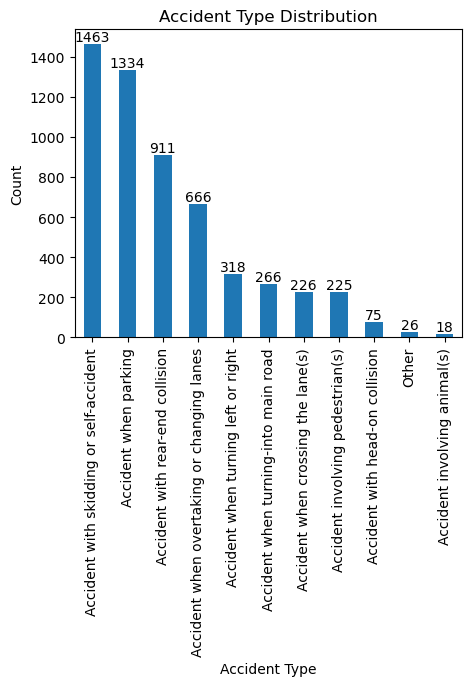

In [87]:
# Get the value counts of 'AccidentType_en'
value_counts = accidents['AccidentType_en'].value_counts()

# Create a bar plot
plt.figure(figsize=(5,4))  
value_counts.plot(kind='bar')
plt.xlabel('Accident Type')
plt.ylabel('Count')
plt.title('Accident Type Distribution')
for i, count in enumerate(value_counts):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')  #Show value counts
plt.show()

##### Accident severity category distribution

In [89]:
print(accidents['AccidentSeverityCategory_en'].value_counts())

Accident with property damage    4233
Accident with light injuries     1107
Accident with severe injuries     182
Accident with fatalities            6
Name: AccidentSeverityCategory_en, dtype: int64


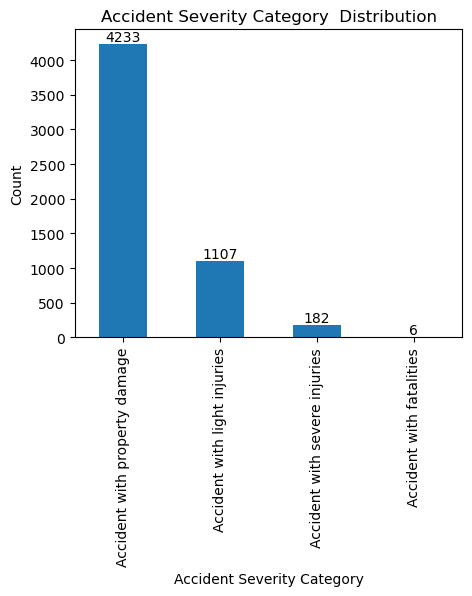

In [90]:
# Get the value counts of 'AccidentSeverityCategory_en'
value_counts = accidents['AccidentSeverityCategory_en'].value_counts()
# Create a bar plot
plt.figure(figsize=(5,4)) 
value_counts.plot(kind='bar')
plt.xlabel('Accident Severity Category')
plt.ylabel('Count')
plt.title('Accident Severity Category  Distribution')
for i, count in enumerate(value_counts):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')  #Show value counts
plt.show()

##### Hours when accident happened distribution

In [ ]:
print(accidents['AccidentHour'].value_counts())

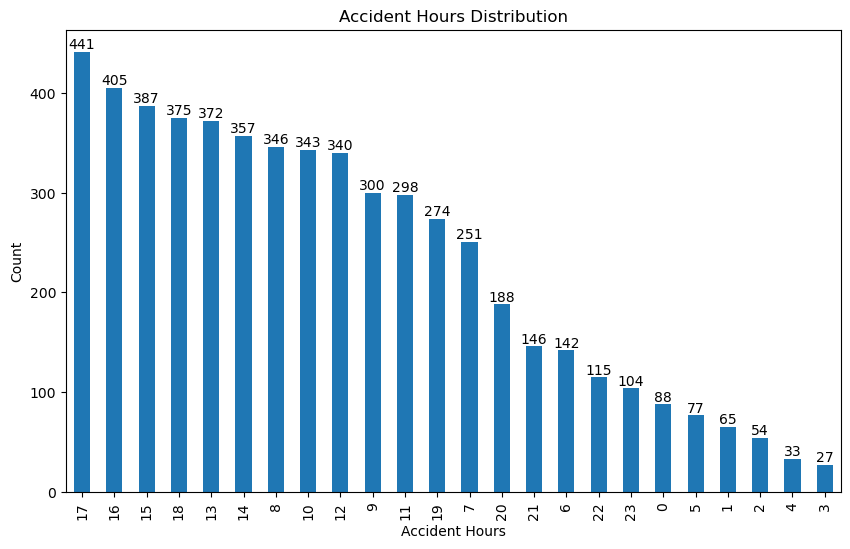

In [92]:
# Get the value counts of 'AccidentSeverityCategory_en'
value_counts = accidents['AccidentHour'].value_counts()
# Create a bar plot
plt.figure(figsize=(10,6)) 
value_counts.plot(kind='bar')
plt.xlabel('Accident Hours')
plt.ylabel('Count')
plt.title('Accident Hours Distribution')
for i, count in enumerate(value_counts):
    plt.annotate(str(count), xy=(i, count), ha='center', va='bottom')  #Show value counts
plt.show()

## Zürich weather data 2019

In [51]:
#Import dataset
w19_hr = pd.read_csv('../data/2019/ugz_ogd_meteo_h1_2019.csv', header = 0)
w19_hr

,Datum,Standort,Parameter,Intervall,Einheit,Wert,Status
0,2019-01-01T00:00+0100,Zch_Rosengartenstrasse,Hr,h1,%Hr,89.22,bereinigt
1,2019-01-01T00:00+0100,Zch_Rosengartenstrasse,RainDur,h1,min,0.00,bereinigt
2,2019-01-01T00:00+0100,Zch_Rosengartenstrasse,T,h1,°C,5.14,bereinigt
3,2019-01-01T00:00+0100,Zch_Rosengartenstrasse,WD,h1,°,96.36,bereinigt
4,2019-01-01T00:00+0100,Zch_Rosengartenstrasse,WVs,h1,m/s,0.49,bereinigt
...,...,...,...,...,...,...,...
183955,2019-12-31T23:00+0100,Zch_Stampfenbachstrasse,WD,h1,°,37.95,bereinigt
183956,2019-12-31T23:00+0100,Zch_Stampfenbachstrasse,WVs,h1,m/s,1.80,bereinigt
183957,2019-12-31T23:00+0100,Zch_Stampfenbachstrasse,WVv,h1,m/s,1.68,bereinigt
183958,2019-12-31T23:00+0100,Zch_Stampfenbachstrasse,p,h1,hPa,982.21,bereinigt


### View of data types and structure

In [52]:
#View datatypes
w19_hr.dtypes

Datum         object
Standort      object
Parameter     object
Intervall     object
Einheit       object
Wert         float64
Status        object
dtype: object

In [53]:
# View measurement locations
print(w19_hr['Standort'].unique())

['Zch_Rosengartenstrasse' 'Zch_Schimmelstrasse' 'Zch_Stampfenbachstrasse']


In [54]:
# View measurement parameters
print(w19_hr['Parameter'].unique())

['Hr' 'RainDur' 'T' 'WD' 'WVs' 'WVv' 'p' 'StrGlo']


In [55]:
# Filter interesting parameters
conditions = ['StrGlo', 'WD', 'WVv']
filtered = w19_hr.loc[~w19_hr['Parameter'].isin(conditions)]
filtered.head()

,Datum,Standort,Parameter,Intervall,Einheit,Wert,Status
0,2019-01-01T00:00+0100,Zch_Rosengartenstrasse,Hr,h1,%Hr,89.22,bereinigt
1,2019-01-01T00:00+0100,Zch_Rosengartenstrasse,RainDur,h1,min,0.00,bereinigt
2,2019-01-01T00:00+0100,Zch_Rosengartenstrasse,T,h1,°C,5.14,bereinigt
4,2019-01-01T00:00+0100,Zch_Rosengartenstrasse,WVs,h1,m/s,0.49,bereinigt
6,2019-01-01T00:00+0100,Zch_Rosengartenstrasse,p,h1,hPa,982.12,bereinigt


### Average hourly measurements

Since there are measurements from each location at each timepoint (hourly data), we average them (Zürich is not that large to have crucial differences in weather between the locations)

In [77]:
# Group by date (hours)
# Create new dataframe with locations sorted under timepoints (long to wide)

w19_new = pd.pivot(filtered, index = ['Datum', 'Standort'], 
                   columns = ['Parameter'], values = ['Wert'])


In [78]:
# View levels of indices on columns
w19_new.columns.levels

FrozenList([['Wert'], ['Hr', 'RainDur', 'T', 'WVs', 'p']])

In [74]:
w19_new.columns.get_level_values(1)

Index(['Hr', 'RainDur', 'T', 'WVs', 'p'], dtype='object', name='Parameter')

In [75]:
# Drop outermost level (Wert)
w19_new.columns = w19_new.columns.droplevel() 

w19_new.head(50)

Parameter                                         Hr  RainDur     T   WVs  \
Datum                 Standort                                              
2019-01-01T00:00+0100 Zch_Rosengartenstrasse   89.22     0.00  5.14  0.49   
                      Zch_Schimmelstrasse      85.81     0.00  5.71   NaN   
                      Zch_Stampfenbachstrasse  87.69     0.00  5.24  1.19   
2019-01-01T01:00+0100 Zch_Rosengartenstrasse   89.72     0.00  4.99  0.33   
                      Zch_Schimmelstrasse      85.58     0.00  5.50   NaN   
                      Zch_Stampfenbachstrasse  87.71     0.00  5.09  0.87   
2019-01-01T02:00+0100 Zch_Rosengartenstrasse   89.72     0.00  5.07  0.41   
                      Zch_Schimmelstrasse      85.01     0.00  5.51   NaN   
                      Zch_Stampfenbachstrasse  87.14     0.00  5.16  1.22   
2019-01-01T03:00+0100 Zch_Rosengartenstrasse   89.45     0.00  4.69  0.62   
                      Zch_Schimmelstrasse      84.78     0.00  5.39   NaN   
                      Zch_Stampfenbachstrasse  87.22     0.00  4.86  1.26   
2019-01-01T04:00+0100 Zch_Rosengartenstrasse   87.97     0.00  4.69  0.34   
                      Zch_Schimmelstrasse      84.73     0.00  5.23   NaN   
                      Zch_Stampfenbachstrasse  85.84     0.00  4.80  1.29   
2019-01-01T05:00+0100 Zch_Rosengartenstrasse   86.92     0.00  4.80  0.29   
                      Zch_Schimmelstrasse      84.52     0.00  5.08   NaN   
                      Zch_Stampfenbachstrasse  84.78     0.00  4.88  1.01   
2019-01-01T06:00+0100 Zch_Rosengartenstrasse   86.66     0.00  4.58  0.28   
                      Zch_Schimmelstrasse      83.44     0.00  4.97   NaN   
                      Zch_Stampfenbachstrasse  85.58     0.00  4.78  0.97   
2019-01-01T07:00+0100 Zch_Rosengartenstrasse   85.23     0.00  4.60  0.43   
                      Zch_Schimmelstrasse      82.90     0.00  4.97   NaN   
                      Zch_Stampfenbachstrasse  84.80     0.00  4.68  0.94   
2019-01-01T08:00+0100 Zch_Rosengartenstrasse   86.44     0.00  4.41  0.61   
                      Zch_Schimmelstrasse      84.64     0.00  4.67   NaN   
                      Zch_Stampfenbachstrasse  85.10     0.00  4.59  1.40   
2019-01-01T09:00+0100 Zch_Rosengartenstrasse   86.76     0.00  4.40  0.42   
                      Zch_Schimmelstrasse      83.93     0.00  4.89   NaN   
                      Zch_Stampfenbachstrasse  85.65     0.00  4.45  0.92   
2019-01-01T10:00+0100 Zch_Rosengartenstrasse   84.97     0.00  4.86  0.77   
                      Zch_Schimmelstrasse      82.32     0.00  5.26   NaN   
                      Zch_Stampfenbachstrasse  83.94     0.00  4.80  1.58   
2019-01-01T11:00+0100 Zch_Rosengartenstrasse   82.57     0.00  4.98  0.94   
                      Zch_Schimmelstrasse      80.57     0.00  5.39   NaN   
                      Zch_Stampfenbachstrasse  81.43     0.00  5.12  2.34   
2019-01-01T12:00+0100 Zch_Rosengartenstrasse   82.79     0.00  4.87  0.95   
                      Zch_Schimmelstrasse      79.98     0.00  5.37   NaN   
                      Zch_Stampfenbachstrasse  81.36     0.00  5.01  2.49   
2019-01-01T13:00+0100 Zch_Rosengartenstrasse   80.53     0.00  5.33  1.08   
                      Zch_Schimmelstrasse      77.32     0.00  5.68   NaN   
                      Zch_Stampfenbachstrasse  78.63     0.00  5.41  2.52   
2019-01-01T14:00+0100 Zch_Rosengartenstrasse   81.34     0.00  5.56  0.67   
                      Zch_Schimmelstrasse      77.00     0.00  6.12   NaN   
                      Zch_Stampfenbachstrasse  78.84     0.00  5.70  2.04   
2019-01-01T15:00+0100 Zch_Rosengartenstrasse   80.96     0.00  5.43  0.79   
                      Zch_Schimmelstrasse      78.97     0.00  5.73   NaN   
                      Zch_Stampfenbachstrasse  79.15     0.00  5.55  1.80   
2019-01-01T16:00+0100 Zch_Rosengartenstrasse   80.17     0.02  5.38  0.64   
                      Zch_Schimmelstrasse      76.68     0.00  5.77   NaN

In [59]:
# Averaged values under each timepoint

# Save dates 
dates = w19_new.reset_index(inplace=False) #Save dates as new column (were indices here)
dates = dates['Datum']                   # Name the column
dates = dates.drop_duplicates()          # Drop multiplicates (each day was x5 or x8)
dates = dates.to_frame()                 # Turn list into df
dates = dates.reset_index(drop = True)   # Reindexing
dates

# Average values
w19_avg = w19_new.groupby(np.arange(len(w19_new))//3).mean()
w19_avg

Parameter,Hr,RainDur,T,WVs,p
0,87.573333,0.0,5.363333,0.840,982.780000
1,87.670000,0.0,5.193333,0.600,982.886667
2,87.290000,0.0,5.246667,0.815,983.180000
3,87.150000,0.0,4.980000,0.940,982.926667
4,86.180000,0.0,4.906667,0.815,981.926667
...,...,...,...,...,...
8755,89.503333,0.0,1.636667,0.850,982.966667
8756,91.496667,0.0,1.246667,1.065,983.070000
8757,92.470000,0.0,0.900000,1.600,983.140000
8758,92.656667,0.0,0.333333,1.825,983.350000


In [64]:
# Join average with dates

# Make sure that indices are the same
w19_avg = w19_avg.reset_index(drop=True)
w19_avg.index

dates = dates.reset_index(drop=True)
dates.index

# Check if all elements are True
if all(w19_avg.index == dates.index):
    print("TRUE")
else:
    print("FALSE")


TRUE


In [66]:
#Merge
w19 = pd.merge(w19_avg, dates, left_index = True, right_index = True)
w19

,Hr,RainDur,T,WVs,p,Datum
0,87.573333,0.0,5.363333,0.840,982.780000,2019-01-01T00:00+0100
1,87.670000,0.0,5.193333,0.600,982.886667,2019-01-01T01:00+0100
2,87.290000,0.0,5.246667,0.815,983.180000,2019-01-01T02:00+0100
3,87.150000,0.0,4.980000,0.940,982.926667,2019-01-01T03:00+0100
4,86.180000,0.0,4.906667,0.815,981.926667,2019-01-01T04:00+0100
...,...,...,...,...,...,...
8755,89.503333,0.0,1.636667,0.850,982.966667,2019-12-31T19:00+0100
8756,91.496667,0.0,1.246667,1.065,983.070000,2019-12-31T20:00+0100
8757,92.470000,0.0,0.900000,1.600,983.140000,2019-12-31T21:00+0100
8758,92.656667,0.0,0.333333,1.825,983.350000,2019-12-31T22:00+0100


In [68]:
# Rearrange columns
w19 = w19[['Datum', 'Hr', 'RainDur', 'T', 'WVs', 'p']]
w19

,Datum,Hr,RainDur,T,WVs,p
0,2019-01-01T00:00+0100,87.573333,0.0,5.363333,0.840,982.780000
1,2019-01-01T01:00+0100,87.670000,0.0,5.193333,0.600,982.886667
2,2019-01-01T02:00+0100,87.290000,0.0,5.246667,0.815,983.180000
3,2019-01-01T03:00+0100,87.150000,0.0,4.980000,0.940,982.926667
4,2019-01-01T04:00+0100,86.180000,0.0,4.906667,0.815,981.926667
...,...,...,...,...,...,...
8755,2019-12-31T19:00+0100,89.503333,0.0,1.636667,0.850,982.966667
8756,2019-12-31T20:00+0100,91.496667,0.0,1.246667,1.065,983.070000
8757,2019-12-31T21:00+0100,92.470000,0.0,0.900000,1.600,983.140000
8758,2019-12-31T22:00+0100,92.656667,0.0,0.333333,1.825,983.350000


## Merge datasets: Zürich accidents with weather, 2019

In [82]:
import dask.dataframe as dd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# %% Merge datasets
df_19 = dd.merge(accidents, w19, how='inner', on=['Datum'])

### Clean up data

In [84]:
#%% Drop NaNs, nonsense values
df_19.dtypes

# Fix datatypes
df_19['AccidentType'] = df_19['AccidentType'].astype('category')
df_19['AccidentType_en'] = df_19['AccidentType_en'].astype('category')
df_19['AccidentSeverityCategory'] = df_19['AccidentSeverityCategory'].astype('category')
df_19['AccidentSeverityCategory_en'] = df_19['AccidentSeverityCategory_en'].astype('category')
df_19['RoadType'] = df_19['RoadType'].astype('category')
df_19['RoadType_en'] = df_19['RoadType_en'].astype('category')
df_19['AccidentYear'] = df_19['AccidentYear'].astype('category')
df_19['AccidentMonth'] = df_19['AccidentMonth'].astype('category')
df_19['AccidentMonth_en'] = df_19['AccidentMonth_en'].astype('category')
df_19['AccidentWeekDay'] = df_19['AccidentWeekDay'].astype('category')
df_19['AccidentWeekDay_en'] = df_19['AccidentWeekDay_en'].astype('category')
df_19['AccidentHour'] = df_19['AccidentHour'].astype('category')
df_19['AccidentHour_text'] = df_19['AccidentHour_text'].astype('category')

# Drop NaNs
df_19 = df_19.dropna()

### Infer additional information from data

#### Indicate holidays (official bank holidays)
from https://www.zh.ch/content/dam/zhweb/bilder-dokumente/footer/arbeiten-fuer-den-kanton/personalamt/Feiertage2019.pdf

In [93]:
#Indicate holidays 

holiday_dates = ['2019-01-01', '2019-01-02',
                 '2019-04-08', '2019-04-18', '2019-04-19', '2019-04-22',
                 '2019-05-01', '2019-05-29', '2019-05-30',
                 '2019-06-10', 
                 '2019-08-01', 
                 '2019-09-09',
                 '2019-12-24',  '2019-12-25',  '2019-12-26',  '2019-12-31']
                 

df_19['Is_Holiday'] = np.nan

df_19['Date'] = pd.to_datetime(df_19['Date'])

# Set 'Is_Holiday' column based on holiday dates
df_19['Is_Holiday'] = df_19['Date'].isin(holiday_dates)

#### Indicate weekends (Saturday, Sunday)

In [94]:
# Indicate weekends

weekends = ['Saturday', 'Sunday']

df_19['Is_Weekend'] = np.nan


df_19['Is_Weekend'] = df_19['AccidentWeekDay_en'].isin(weekends)

#### Indicate rush hour
from https://www.tomtom.com/traffic-index/zurich-traffic/

In [95]:
# Indicate rush hour
df_19['Is_RushHour'] = np.nan
rushhour = [7,8,16,17,18]

df_19['Is_RushHour'] = df_19['AccidentHour'].isin(rushhour)

#### Indicate rainy hours

In [314]:
# Indicate rain
df_19['Is_Rainy'] = np.where(df_19['RainDur'] != 0, "True", "False")
df_19['Is_Rainy'] = df_19['RainDur'].astype(bool)


#### Indicate windy hours

In [156]:
print(df_19['WVs'].min())
print(df_19['WVs'].max())

0.23
5.355


The wind exhibits relatively low strength.

In [315]:
df_19.head(50)

,AccidentUID,AccidentType,AccidentType_en,AccidentSeverityCategory,AccidentSeverityCategory_en,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,RoadType,RoadType_en,AccidentLocation_CHLV95_E,AccidentLocation_CHLV95_N,CantonCode,MunicipalityCode,AccidentYear,AccidentMonth,AccidentMonth_en,AccidentWeekDay,AccidentWeekDay_en,AccidentHour,AccidentHour_text,DayCount,Date,Datum,Hr,RainDur,T,WVs,p,Is_Holiday,Is_Weekend,Is_RushHour,Is_Rainy,RainDurIntervals
0,7F14F57457377D48E05328B9D80AA62A,at2,Accident with rear-end collision,as4,Accident with property damage,False,False,False,rt432,Principal road,2682306,1247037,ZH,261,2019,1,January,aw402,Tuesday,1,01h-02h,1,2019-01-01,2019-01-01T01:00+0100,87.670000,0.000000,5.193333,0.600,982.886667,True,False,False,False,"[0.0, 10.0)"
1,7E8A0BAE5F9D9AACE05328B9D80ACFB0,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,False,False,rt433,Minor road,2682739,1247557,ZH,261,2019,1,January,aw402,Tuesday,1,01h-02h,1,2019-01-01,2019-01-01T01:00+0100,87.670000,0.000000,5.193333,0.600,982.886667,True,False,False,False,"[0.0, 10.0)"
2,8133D764BE03EA54E05328B9D80A0E22,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,False,False,rt439,Other,2683731,1246631,ZH,261,2019,1,January,aw402,Tuesday,1,01h-02h,1,2019-01-01,2019-01-01T01:00+0100,87.670000,0.000000,5.193333,0.600,982.886667,True,False,False,False,"[0.0, 10.0)"
3,7F7C471743CF9D3DE05328B9D80AF402,at2,Accident with rear-end collision,as3,Accident with light injuries,False,False,False,rt433,Minor road,2683678,1247601,ZH,261,2019,1,January,aw402,Tuesday,2,02h-03h,1,2019-01-01,2019-01-01T02:00+0100,87.290000,0.000000,5.246667,0.815,983.180000,True,False,False,False,"[0.0, 10.0)"
4,841F44676EB00B9AE05328B9D80A33D9,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,False,False,rt432,Principal road,2682798,1244631,ZH,261,2019,1,January,aw402,Tuesday,3,03h-04h,1,2019-01-01,2019-01-01T03:00+0100,87.150000,0.000000,4.980000,0.940,982.926667,True,False,False,False,"[0.0, 10.0)"
5,80818333CE5F7C60E05328B9D80A7347,at4,Accident when turning-into main road,as4,Accident with property damage,False,False,False,rt433,Minor road,2682206,1248121,ZH,261,2019,1,January,aw402,Tuesday,7,07h-08h,1,2019-01-01,2019-01-01T07:00+0100,84.310000,0.000000,4.750000,0.685,981.073333,True,False,True,False,"[0.0, 10.0)"
6,7F04A43B01D5F8AFE05328B9D80A5948,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,False,False,rt433,Minor road,2682448,1248881,ZH,261,2019,1,January,aw402,Tuesday,8,08h-09h,1,2019-01-01,2019-01-01T08:00+0100,85.393333,0.000000,4.556667,1.005,981.273333,True,False,True,False,"[0.0, 10.0)"
7,8DEFDB522CFC2660E05328B9D80AEC82,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,False,False,rt433,Minor road,2684652,1248174,ZH,261,2019,1,January,aw402,Tuesday,8,08h-09h,1,2019-01-01,2019-01-01T08:00+0100,85.393333,0.000000,4.556667,1.005,981.273333,True,False,True,False,"[0.0, 10.0)"
8,80D6E5DC6438E84AE05328B9D80A728D,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,False,False,rt433,Minor road,2683277,1247968,ZH,261,2019,1,January,aw402,Tuesday,9,09h-10h,1,2019-01-01,2019-01-01T09:00+0100,85.446667,0.000000,4.580000,0.670,981.173333,True,False,False,False,"[0.0, 10.0)"
9,7EDA781C143255ACE05328B9D80AE1E3,at7,Accident when parking,as4,Accident with property damage,False,False,False,rt433,Minor road,2684407,1245640,ZH,261,2019,1,January,aw402,Tuesday,16,16h-17h,1,2019-01-01,2019-01-01T16:00+0100,78.183333,0.006667,5.570000,1.285,980.330000,True,False,True,True,"[0.0, 10.0)"


### Summary statistics

In [195]:
#%% Summary statistics
summary_df19 = df_19.describe()
summary_df19

,AccidentLocation_CHLV95_E,AccidentLocation_CHLV95_N,MunicipalityCode,DayCount,Hr,RainDur,T,WVs,p
count,5.528000e+03,5.528000e+03,5528.0,5528.000000,5528.000000,5528.000000,5528.000000,5528.000000,5528.000000
mean,2.682582e+06,1.248413e+06,261.0,185.548661,63.866013,5.247457,13.826852,1.361860,966.732514
std,1.778535e+03,2.159447e+03,0.0,100.955324,18.802593,14.300861,8.373243,0.726619,8.118491
min,2.677612e+06,1.242098e+06,261.0,1.000000,18.493333,0.000000,-3.023333,0.230000,932.886667
25%,2.681560e+06,1.247010e+06,261.0,99.000000,48.530000,0.000000,7.183333,0.850000,962.603333
50%,2.682730e+06,1.248016e+06,261.0,184.000000,65.600000,0.000000,13.203333,1.200000,967.221667
75%,2.683677e+06,1.249741e+06,261.0,272.000000,80.097500,0.000000,20.096667,1.670000,971.363333
max,2.688002e+06,1.254077e+06,261.0,365.000000,94.946667,60.000000,35.423333,5.355000,986.656667


#### Number of accidents per day

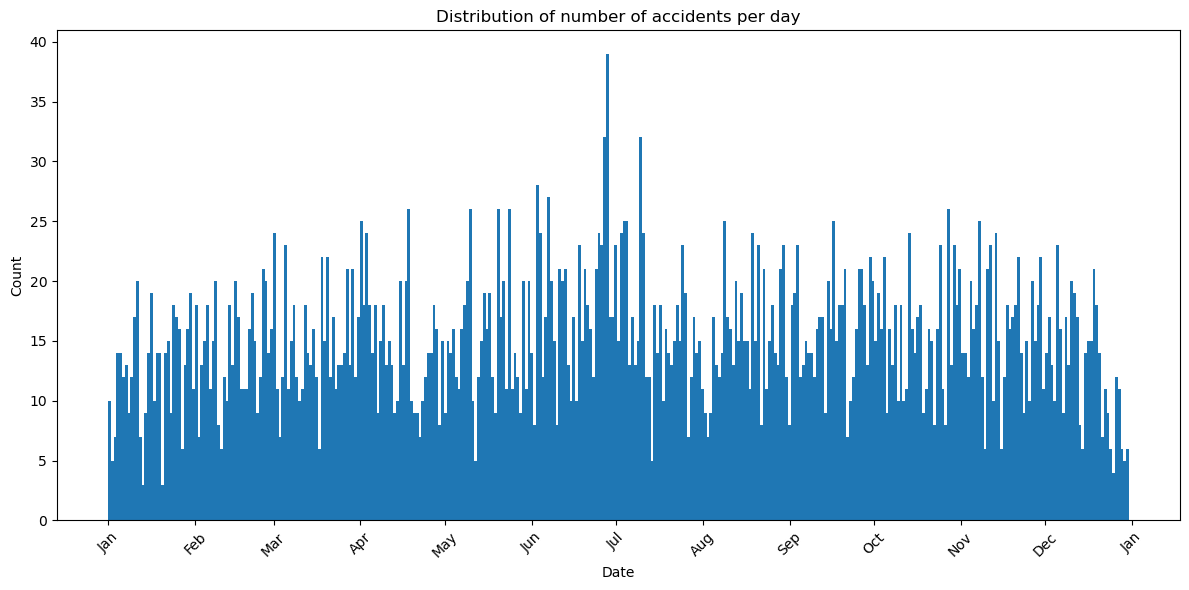

In [178]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Set figure size
plt.figure(figsize=(12, 6))

# Histogram, for each day
plt.hist(df_19['Date'], bins=365)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Distribution of number of accidents per day')

# Set the x-axis ticker to display month labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format month as abbreviated name

# Rotate xlabel for readability
plt.xticks(rotation=45)

# Adjust the layout to prevent overlapping of labels
plt.tight_layout()
plt.show()

There are peaks which could possibly indicate higher occurrences of accidents on weekends. The highest overall count is during summer.
#### Number of accidents per day, weekends highlighted

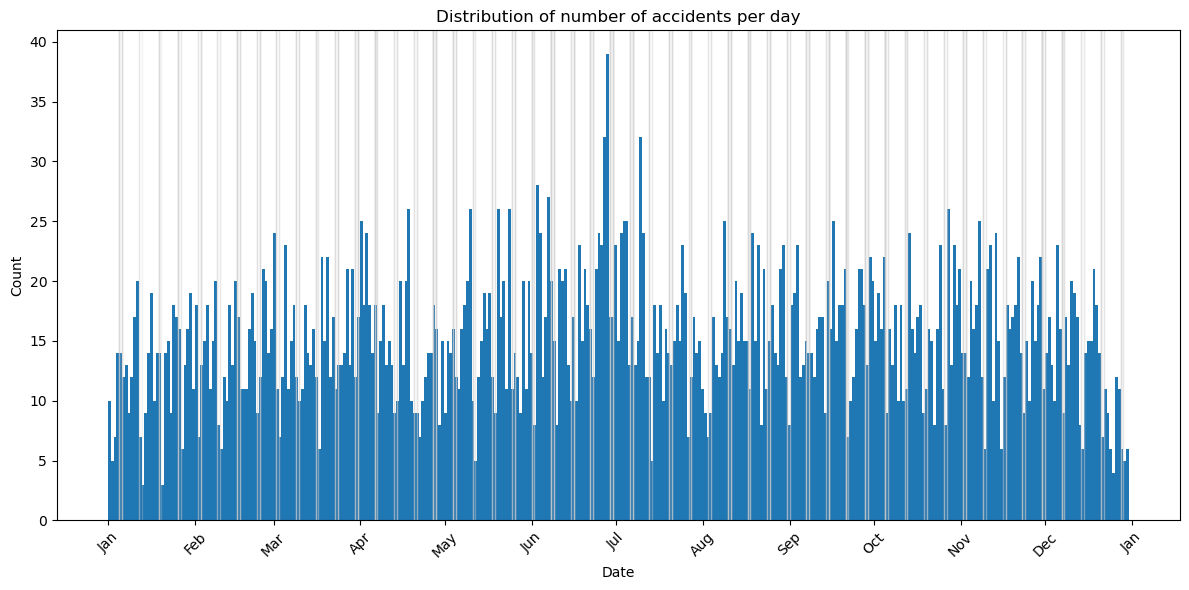

In [239]:
# Set figure size
plt.figure(figsize=(12, 6))

# Histogram, for each day
plt.hist(df_19['Date'], bins=365)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Distribution of number of accidents per day')

# Set the x-axis ticker to display month labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format month as abbreviated name

# Rotate xlabel for readability
plt.xticks(rotation=45)

# Highlight weekends
weekend_dates = df_19[df_19['Is_Weekend']]['Date']
for weekend_date in weekend_dates:
    plt.axvspan(weekend_date, weekend_date , color='lightgray', alpha=0.1)

# Adjust the layout to prevent overlapping of labels
plt.tight_layout()
plt.show()

Surprisingly, the higher occurrences do not overlap with weekends, but right before. 
#### Number of accidents per day, Fridays highlighted

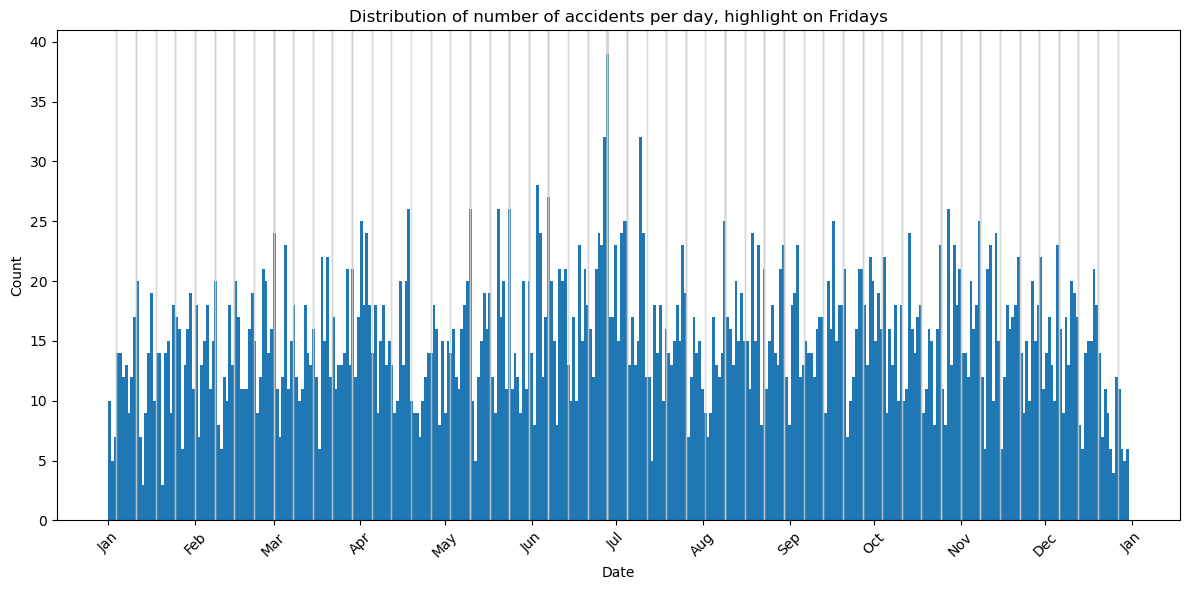

In [243]:
# Set figure size
plt.figure(figsize=(12, 6))

# Histogram, for each day
plt.hist(df_19['Date'], bins=365)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Distribution of number of accidents per day, highlight on Fridays')

# Set the x-axis ticker to display month labels
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format month as abbreviated name

# Rotate xlabel for readability
plt.xticks(rotation=45)

# Highlight Fridays
friday_dates = df_19[df_19['AccidentWeekDay_en'] == 'Friday']['Date']
for friday_date in friday_dates:
    plt.axvspan(friday_date, friday_date, color='lightgray', alpha=0.1)

# Adjust the layout to prevent overlapping of labels
plt.tight_layout()
plt.show()

Some Fridays indeed overlap with higher frequencies of accidents.

#### Number of accidents per days of the week 

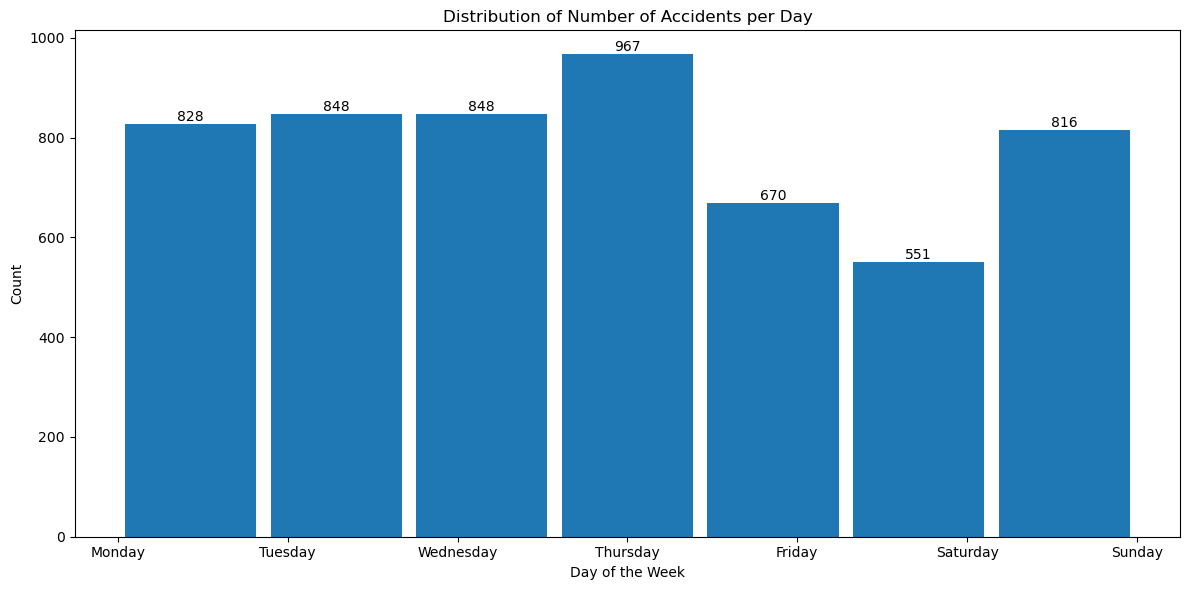

In [205]:
# Set figure size
plt.figure(figsize=(12, 6))

# Histogram, for each day
counts, bins, patches = plt.hist(df_19['AccidentWeekDay_en'], bins=7, rwidth=0.9)

# Set labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Distribution of Number of Accidents per Day')

# Set the x-axis ticker to display day labels
plt.xticks(np.arange(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Add count on top of bars
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, count, str(int(count)),
             ha='center', va='bottom')

# Adjust the layout to prevent overlapping of labels
plt.tight_layout()
plt.show()


Surprisingly, the overall distribution of the occurrance of accidents do not seem to point to higher incident number on weekends, neither on Fridays.

#### Accident types per months

<Figure size 1200x600 with 0 Axes>

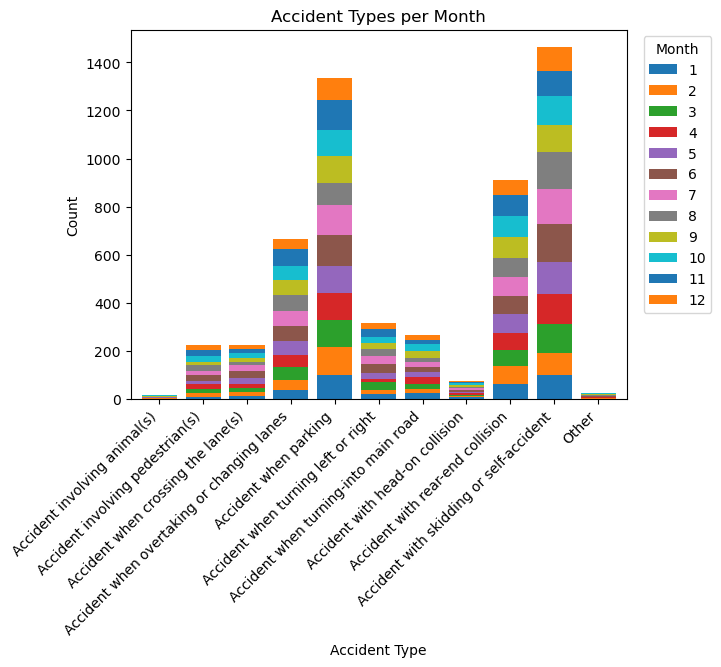

In [172]:
# Set figure size
plt.figure(figsize=(12, 6))

# Group the data by AccidentType_en and AccidentMonth, and count the occurrences
grouped_data = df_19.groupby(['AccidentType_en', 'AccidentMonth']).size().unstack()

# Plot the grouped bar chart
ax = grouped_data.plot(kind='bar', stacked=True, width=0.8)

# Set labels and title
plt.xlabel('Accident Type')
plt.ylabel('Count')
plt.title('Accident Types per Month')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Move the legend to the right side
plt.legend(title='Month', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.show()

Skidding or self-accidents, parking-related incidents, and rear-end collisions are frequently observed in the dataset, indicating their prevalence among recorded accidents. Moreover, there appears to be a relatively uniform distribution of accidents across the different months, suggesting a consistent occurrence throughout the year.

#### Accident severity by months

<Figure size 1200x600 with 0 Axes>

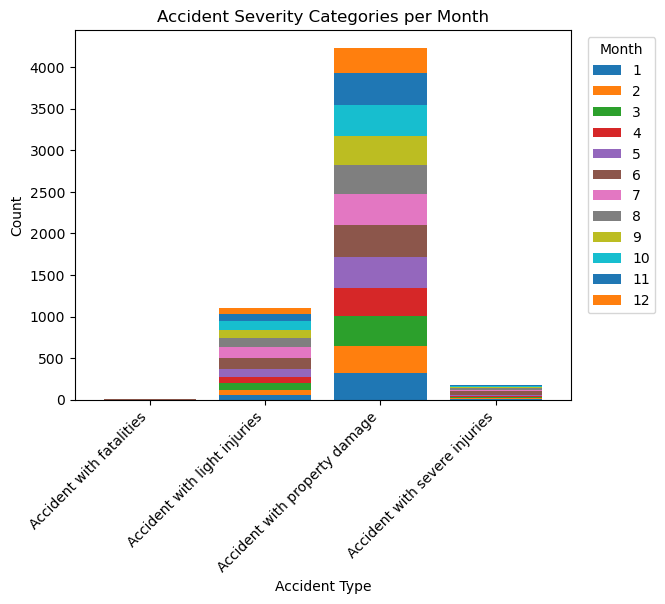

In [174]:
# Set figure size
plt.figure(figsize=(12, 6))

# Group the data by severity and AccidentMonth, and count the occurrences
grouped_data = df_19.groupby(['AccidentSeverityCategory_en', 'AccidentMonth']).size().unstack()

# Plot the grouped bar chart
ax = grouped_data.plot(kind='bar', stacked=True, width=0.8)

# Set labels and title
plt.xlabel('Accident Type')
plt.ylabel('Count')
plt.title('Accident Severity Categories per Month')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Move the legend to the right side
plt.legend(title='Month', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.show()

Property damage is the predominant consequence of accidents, exhibiting a notable occurrence pattern that is relatively consistent across all months of the year. Additionally, accidents resulting in light injuries display a moderate presence, with a slight inclination towards the summer season.

#### Accident types by road types

<Figure size 1200x600 with 0 Axes>

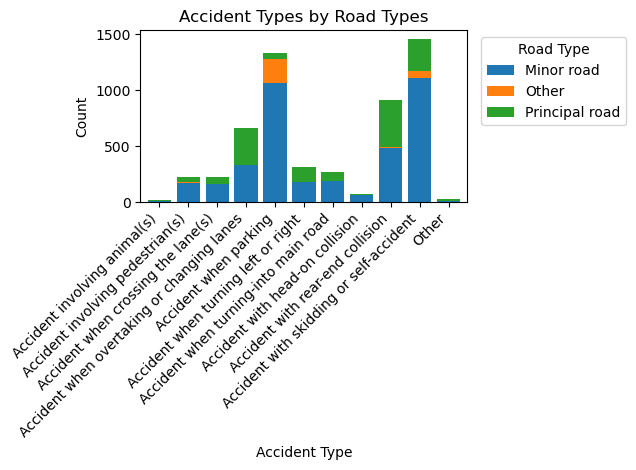

In [181]:
plt.figure(figsize=(12, 6))

# Group the data by AccidentType_en and RoadType, and count the occurrences
grouped_data = df_19.groupby(['AccidentType_en', 'RoadType_en']).size().unstack()

# Plot the grouped bar chart
ax = grouped_data.plot(kind='bar', stacked=True, width=0.8)

plt.xlabel('Accident Type')
plt.ylabel('Count')
plt.title('Accident Types by Road Types')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Move the legend to the right side
plt.legend(title='Road Type', bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust the layout to prevent overlapping of labels
plt.tight_layout()
plt.show()

Minor roads account for the majority of reported accidents, indicating a higher frequency compared to other road types.

#### Accidents by rain duration intervals
Rain duration is maximum 60 minutes (dataset is hourly), 10-minute intervals created for plotting.

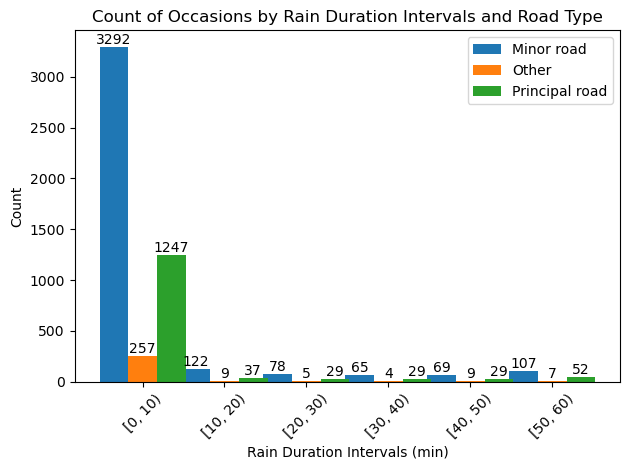

In [246]:
# Convert RainDur into 10-minute intervals
df_19['RainDurIntervals'] = pd.cut(df_19['RainDur'], bins=np.arange(0, 70, 10), right=False)

# Group the dataset by road type and rain duration intervals, and calculate the count for each occasion
grouped_data = df_19.groupby(['RoadType_en', 'RainDurIntervals']).size().reset_index(name='Count')

# Set the width of each bar
bar_width = 0.35

# Set the x-axis values based on the unique rain duration intervals
x = np.arange(len(grouped_data['RainDurIntervals'].unique()))

# Plot the count of occasions for each road type and rain duration interval
for i, road_type in enumerate(grouped_data['RoadType_en'].unique()):
    road_type_data = grouped_data[grouped_data['RoadType_en'] == road_type]
    plt.bar(x + i * bar_width, road_type_data['Count'], width=bar_width, label=road_type)
    
        # Add count labels on top of the bars
    for j, count in enumerate(road_type_data['Count']):
        plt.text(x[j] + i * bar_width, count, str(count), ha='center', va='bottom')

# Set the x-axis tick labels as the rain duration intervals
plt.xticks(x + (bar_width * (len(grouped_data['RoadType_en'].unique()) - 1)) 
                   / 2, grouped_data['RainDurIntervals'].unique())
plt.xlabel('Rain Duration Intervals (min)')
plt.ylabel('Count')
plt.title('Count of Occasions by Rain Duration Intervals and Road Type')
plt.legend()

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45)

# Adjust the layout to prevent overlapping of labels
plt.tight_layout()
plt.show()

#### Accident severity by rain duration intervals

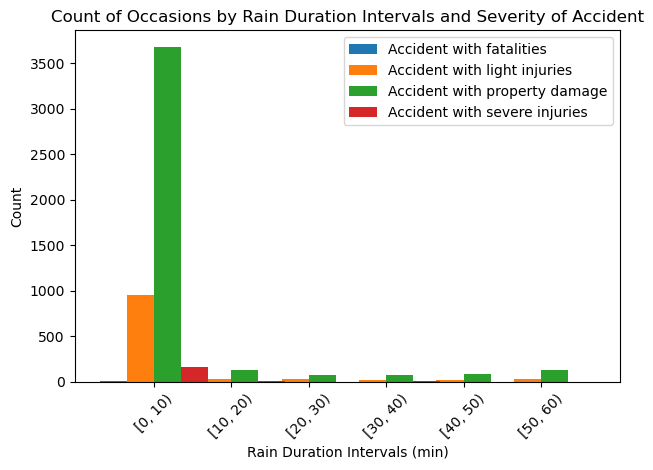

In [262]:
# Convert RainDur into 10-minute intervals
df_19['RainDurIntervals'] = pd.cut(df_19['RainDur'], bins=np.arange(0, 70, 10), right=False)

# Group the dataset by accident severity and rain duration intervals, and calculate the count for each occasion
grouped_data = df_19.groupby(['AccidentSeverityCategory_en', 'RainDurIntervals']).size().reset_index(name='Count')

# Set the width of each bar
bar_width = 0.35

# Set the x-axis values based on the unique rain duration intervals
x = np.arange(len(grouped_data['RainDurIntervals'].unique()))

# Plot the count of occasions for each accident severity and rain duration interval
for i, severity in enumerate(grouped_data['AccidentSeverityCategory_en'].unique()):
    severity_data = grouped_data[grouped_data['AccidentSeverityCategory_en'] == severity]
    plt.bar(x + i * bar_width, severity_data['Count'], width=bar_width, label=severity)
    

# Set the x-axis tick labels as the rain duration intervals
plt.xticks(x + (bar_width * (len(grouped_data['AccidentSeverityCategory_en'].unique()) - 1)) / 2, grouped_data['RainDurIntervals'].unique())
plt.xlabel('Rain Duration Intervals (min)')
plt.ylabel('Count')
plt.title('Count of Occasions by Rain Duration Intervals and Severity of Accident')
plt.legend()

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45)

# Adjust the layout to prevent overlapping of labels
plt.tight_layout()
plt.show()


Surprisingly, there appears to be no apparent relationship between the duration of rain and the occurrence or severity of accidents.

#### Number of accidents in light of temperature

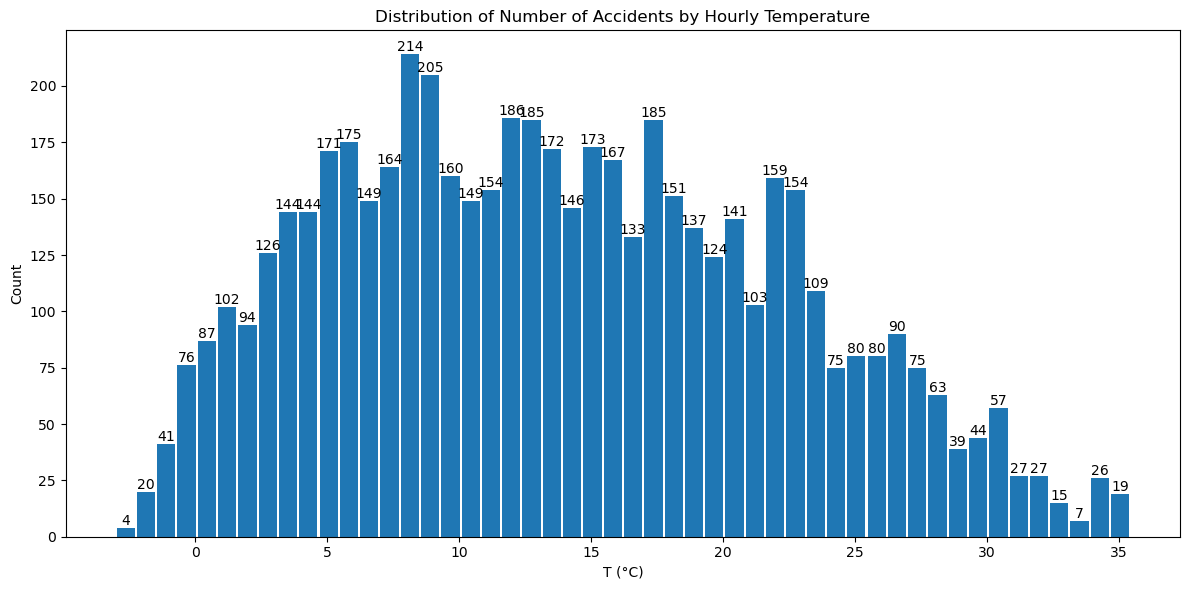

In [245]:
# Set figure size
plt.figure(figsize=(12, 6))

# Histogram, for each day
counts, bins, patches = plt.hist(df_19['T'], bins=50, rwidth=0.9)

# Set labels and title
plt.xlabel('T (°C)')
plt.ylabel('Count')
plt.title('Distribution of Number of Accidents by Hourly Temperature')


# Add count on top of bars
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, count, str(int(count)),
             ha='center', va='bottom')

# Adjust the layout to prevent overlapping of labels
plt.tight_layout()
plt.show()

#### Accident Severity by Temperature

<Figure size 1200x600 with 0 Axes>

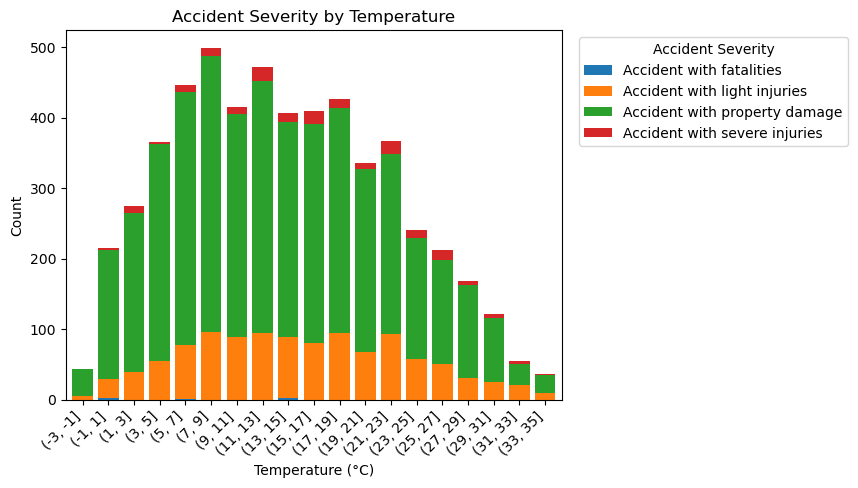

In [257]:
# Define the temperature bins
temperature_bins = np.arange(-3, 36, 2)

# Group the data by temperature and accident severity, and count the occurrences
grouped_data = df_19.groupby([pd.cut(df_19['T'], temperature_bins), 'AccidentSeverityCategory_en']).size().unstack()

# Set figure size
plt.figure(figsize=(12, 6))

# Plot the grouped bar chart
ax = grouped_data.plot(kind='bar', stacked=True, width=0.8)

# Set labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Count')
plt.title('Accident Severity by Temperature')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Move the legend to the right side
plt.legend(title='Accident Severity', bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust the layout to prevent overlapping of labels
# plt.tight_layout()
plt.show()


The observed distributions exhibit a slight right-skewness, indicating no apparent relationship between the frequency or severity of accidents and temperature.

## Correlations

In [263]:
import scipy.stats as stats

Add variable which counts the number of accidents per day

In [316]:
# Group the dataset by day and count the number of occurrences per day
daily_count = df_19.groupby(df_19['Date'].dt.date).size().reset_index(name='EntryCount')

# Merge the count of occurrences with the original dataset
merged_df = pd.merge(df_19, daily_count, left_on=df_19['Date'].dt.date, right_on=daily_count['Date'], how='left')
merged_df = merged_df.drop(columns=['key_0', 'Date_y']).rename(columns={'Date_x': 'Date'})

# Convert EntryCount to integer
merged_df['EntryCount'] = merged_df['EntryCount'].astype(int)


In [317]:
merged_df

,AccidentUID,AccidentType,AccidentType_en,AccidentSeverityCategory,AccidentSeverityCategory_en,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,RoadType,RoadType_en,AccidentLocation_CHLV95_E,AccidentLocation_CHLV95_N,CantonCode,MunicipalityCode,AccidentYear,AccidentMonth,AccidentMonth_en,AccidentWeekDay,AccidentWeekDay_en,AccidentHour,AccidentHour_text,DayCount,Date,Datum,Hr,RainDur,T,WVs,p,Is_Holiday,Is_Weekend,Is_RushHour,Is_Rainy,RainDurIntervals,EntryCount
0,7F14F57457377D48E05328B9D80AA62A,at2,Accident with rear-end collision,as4,Accident with property damage,False,False,False,rt432,Principal road,2682306,1247037,ZH,261,2019,1,January,aw402,Tuesday,1,01h-02h,1,2019-01-01,2019-01-01T01:00+0100,87.670000,0.0,5.193333,0.600,982.886667,True,False,False,False,"[0, 10)",10
1,7E8A0BAE5F9D9AACE05328B9D80ACFB0,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,False,False,rt433,Minor road,2682739,1247557,ZH,261,2019,1,January,aw402,Tuesday,1,01h-02h,1,2019-01-01,2019-01-01T01:00+0100,87.670000,0.0,5.193333,0.600,982.886667,True,False,False,False,"[0, 10)",10
2,8133D764BE03EA54E05328B9D80A0E22,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,False,False,rt439,Other,2683731,1246631,ZH,261,2019,1,January,aw402,Tuesday,1,01h-02h,1,2019-01-01,2019-01-01T01:00+0100,87.670000,0.0,5.193333,0.600,982.886667,True,False,False,False,"[0, 10)",10
3,7F7C471743CF9D3DE05328B9D80AF402,at2,Accident with rear-end collision,as3,Accident with light injuries,False,False,False,rt433,Minor road,2683678,1247601,ZH,261,2019,1,January,aw402,Tuesday,2,02h-03h,1,2019-01-01,2019-01-01T02:00+0100,87.290000,0.0,5.246667,0.815,983.180000,True,False,False,False,"[0, 10)",10
4,841F44676EB00B9AE05328B9D80A33D9,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,False,False,rt432,Principal road,2682798,1244631,ZH,261,2019,1,January,aw402,Tuesday,3,03h-04h,1,2019-01-01,2019-01-01T03:00+0100,87.150000,0.0,4.980000,0.940,982.926667,True,False,False,False,"[0, 10)",10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5523,9C3C1F77345A8844E05329B9D80AD873,at0,Accident with skidding or self-accident,as4,Accident with property damage,False,True,True,rt433,Minor road,2683523,1247624,ZH,261,2019,12,December,aw402,Tuesday,12,12h-13h,365,2019-12-31,2019-12-31T12:00+0100,86.953333,0.0,1.356667,0.745,983.113333,True,False,False,False,"[0, 10)",6
5524,9BFFA5036B8E43D0E05329B9D80A5306,at5,Accident when crossing the lane(s),as3,Accident with light injuries,False,True,False,rt433,Minor road,2681573,1247700,ZH,261,2019,12,December,aw402,Tuesday,18,18h-19h,365,2019-12-31,2019-12-31T18:00+0100,89.306667,0.0,1.493333,0.670,982.793333,True,False,True,False,"[0, 10)",6
5525,9C02A2BD2D010300E05329B9D80A0600,at1,Accident when overtaking or changing lanes,as4,Accident with property damage,False,False,False,rt432,Principal road,2682276,1247052,ZH,261,2019,12,December,aw402,Tuesday,18,18h-19h,365,2019-12-31,2019-12-31T18:00+0100,89.306667,0.0,1.493333,0.670,982.793333,True,False,True,False,"[0, 10)",6
5526,9C28072268B3BA4BE05329B9D80A67E4,at7,Accident when parking,as4,Accident with property damage,False,False,False,rt433,Minor road,2683004,1247184,ZH,261,2019,12,December,aw402,Tuesday,19,19h-20h,365,2019-12-31,2019-12-31T19:00+0100,89.503333,0.0,1.636667,0.850,982.966667,True,False,False,False,"[0, 10)",6


In [318]:
# Select columns of interest
columns_of_interest = ['AccidentType_en', 'AccidentSeverityCategory_en',
                       'AccidentInvolvingPedestrian', 'AccidentInvolvingBicycle', 'AccidentInvolvingMotorcycle',
                       'RoadType_en', 'AccidentWeekDay_en', 'AccidentHour',
                       'Is_Holiday', 'Is_Weekend', 'Is_RushHour', 'Is_Rainy',
                       'Hr', 'RainDur', 'T', 'WVs', 'p']

# Create selection df with columns of interest and EntryCount
df_select = merged_df[columns_of_interest + ['EntryCount']]



In [319]:
df_select

,AccidentType_en,AccidentSeverityCategory_en,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,RoadType_en,AccidentWeekDay_en,AccidentHour,Is_Holiday,Is_Weekend,Is_RushHour,Is_Rainy,Hr,RainDur,T,WVs,p,EntryCount
0,Accident with rear-end collision,Accident with property damage,False,False,False,Principal road,Tuesday,1,True,False,False,False,87.670000,0.0,5.193333,0.600,982.886667,10
1,Accident with skidding or self-accident,Accident with property damage,False,False,False,Minor road,Tuesday,1,True,False,False,False,87.670000,0.0,5.193333,0.600,982.886667,10
2,Accident with skidding or self-accident,Accident with property damage,False,False,False,Other,Tuesday,1,True,False,False,False,87.670000,0.0,5.193333,0.600,982.886667,10
3,Accident with rear-end collision,Accident with light injuries,False,False,False,Minor road,Tuesday,2,True,False,False,False,87.290000,0.0,5.246667,0.815,983.180000,10
4,Accident with skidding or self-accident,Accident with property damage,False,False,False,Principal road,Tuesday,3,True,False,False,False,87.150000,0.0,4.980000,0.940,982.926667,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5523,Accident with skidding or self-accident,Accident with property damage,False,True,True,Minor road,Tuesday,12,True,False,False,False,86.953333,0.0,1.356667,0.745,983.113333,6
5524,Accident when crossing the lane(s),Accident with light injuries,False,True,False,Minor road,Tuesday,18,True,False,True,False,89.306667,0.0,1.493333,0.670,982.793333,6
5525,Accident when overtaking or changing lanes,Accident with property damage,False,False,False,Principal road,Tuesday,18,True,False,True,False,89.306667,0.0,1.493333,0.670,982.793333,6
5526,Accident when parking,Accident with property damage,False,False,False,Minor road,Tuesday,19,True,False,False,False,89.503333,0.0,1.636667,0.850,982.966667,6


### Compute correlations

In [320]:
# Compute the correlation matrix
corr_matrix = df_select[['EntryCount'] + columns_of_interest].corr()
corr_matrix

/var/folders/l7/g63rznns6fncws3rg8cq5lz00000gn/T/ipykernel_92064/3269338825.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_select[['EntryCount'] + columns_of_interest].corr()


,EntryCount,AccidentInvolvingPedestrian,AccidentInvolvingBicycle,AccidentInvolvingMotorcycle,Is_Holiday,Is_Weekend,Is_RushHour,Is_Rainy,Hr,RainDur,T,WVs,p
EntryCount,1.000000,0.039037,0.032562,0.005023,-0.112116,-0.375205,0.027028,-0.092663,-0.170482,-0.040519,0.274719,-0.011165,0.016390
AccidentInvolvingPedestrian,0.039037,1.000000,0.027954,-0.029273,-0.010925,-0.016588,0.012924,0.012933,0.003233,0.026993,0.002951,0.005853,-0.014819
AccidentInvolvingBicycle,0.032562,0.027954,1.000000,-0.070025,0.007883,-0.004615,0.064382,-0.038945,-0.060250,-0.029357,0.112934,-0.008364,0.006872
AccidentInvolvingMotorcycle,0.005023,-0.029273,-0.070025,1.000000,0.003634,0.002455,0.040365,-0.001371,-0.021390,-0.016269,0.051575,-0.015956,0.025870
Is_Holiday,-0.112116,-0.010925,0.007883,0.003634,1.000000,-0.095128,0.003921,-0.012099,-0.015338,-0.018736,-0.015066,-0.041902,0.080564
Is_Weekend,-0.375205,-0.016588,-0.004615,0.002455,-0.095128,1.000000,-0.076624,0.057841,0.037868,0.033574,0.023556,-0.014996,-0.024160
Is_RushHour,0.027028,0.012924,0.064382,0.040365,0.003921,-0.076624,1.000000,-0.019354,-0.037624,-0.014798,0.014924,-0.016353,-0.009710
Is_Rainy,-0.092663,0.012933,-0.038945,-0.001371,-0.012099,0.057841,-0.019354,1.000000,0.465361,0.676779,-0.229543,0.166998,-0.193299
Hr,-0.170482,0.003233,-0.060250,-0.021390,-0.015338,0.037868,-0.037624,0.465361,1.000000,0.425001,-0.611878,-0.208149,-0.137626
RainDur,-0.040519,0.026993,-0.029357,-0.016269,-0.018736,0.033574,-0.014798,0.676779,0.425001,1.000000,-0.207480,0.108713,-0.149196


In [321]:
df_select.dtypes

AccidentType_en                category
AccidentSeverityCategory_en    category
AccidentInvolvingPedestrian        bool
AccidentInvolvingBicycle           bool
AccidentInvolvingMotorcycle        bool
RoadType_en                    category
AccidentWeekDay_en             category
AccidentHour                   category
Is_Holiday                         bool
Is_Weekend                         bool
Is_RushHour                        bool
Is_Rainy                           bool
Hr                              float64
RainDur                         float64
T                               float64
WVs                             float64
p                               float64
EntryCount                        int64
dtype: object

Given that the dataset contains variables of different types, including numeric, boolean, and categorical, it is necessary to examine various types of correlations to gain a comprehensive understanding.

### Pearson correlation and plot
using https://medium.com/the-researchers-guide/generate-numerical-correlation-and-nominal-association-plots-using-python-c8548aa4a663

for  measuring the linear relationship between two continuous variables, assuming that the variables are nearly normally distributed

/var/folders/l7/g63rznns6fncws3rg8cq5lz00000gn/T/ipykernel_92064/2656249666.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson_matrix = df_select.corr(method = 'pearson')


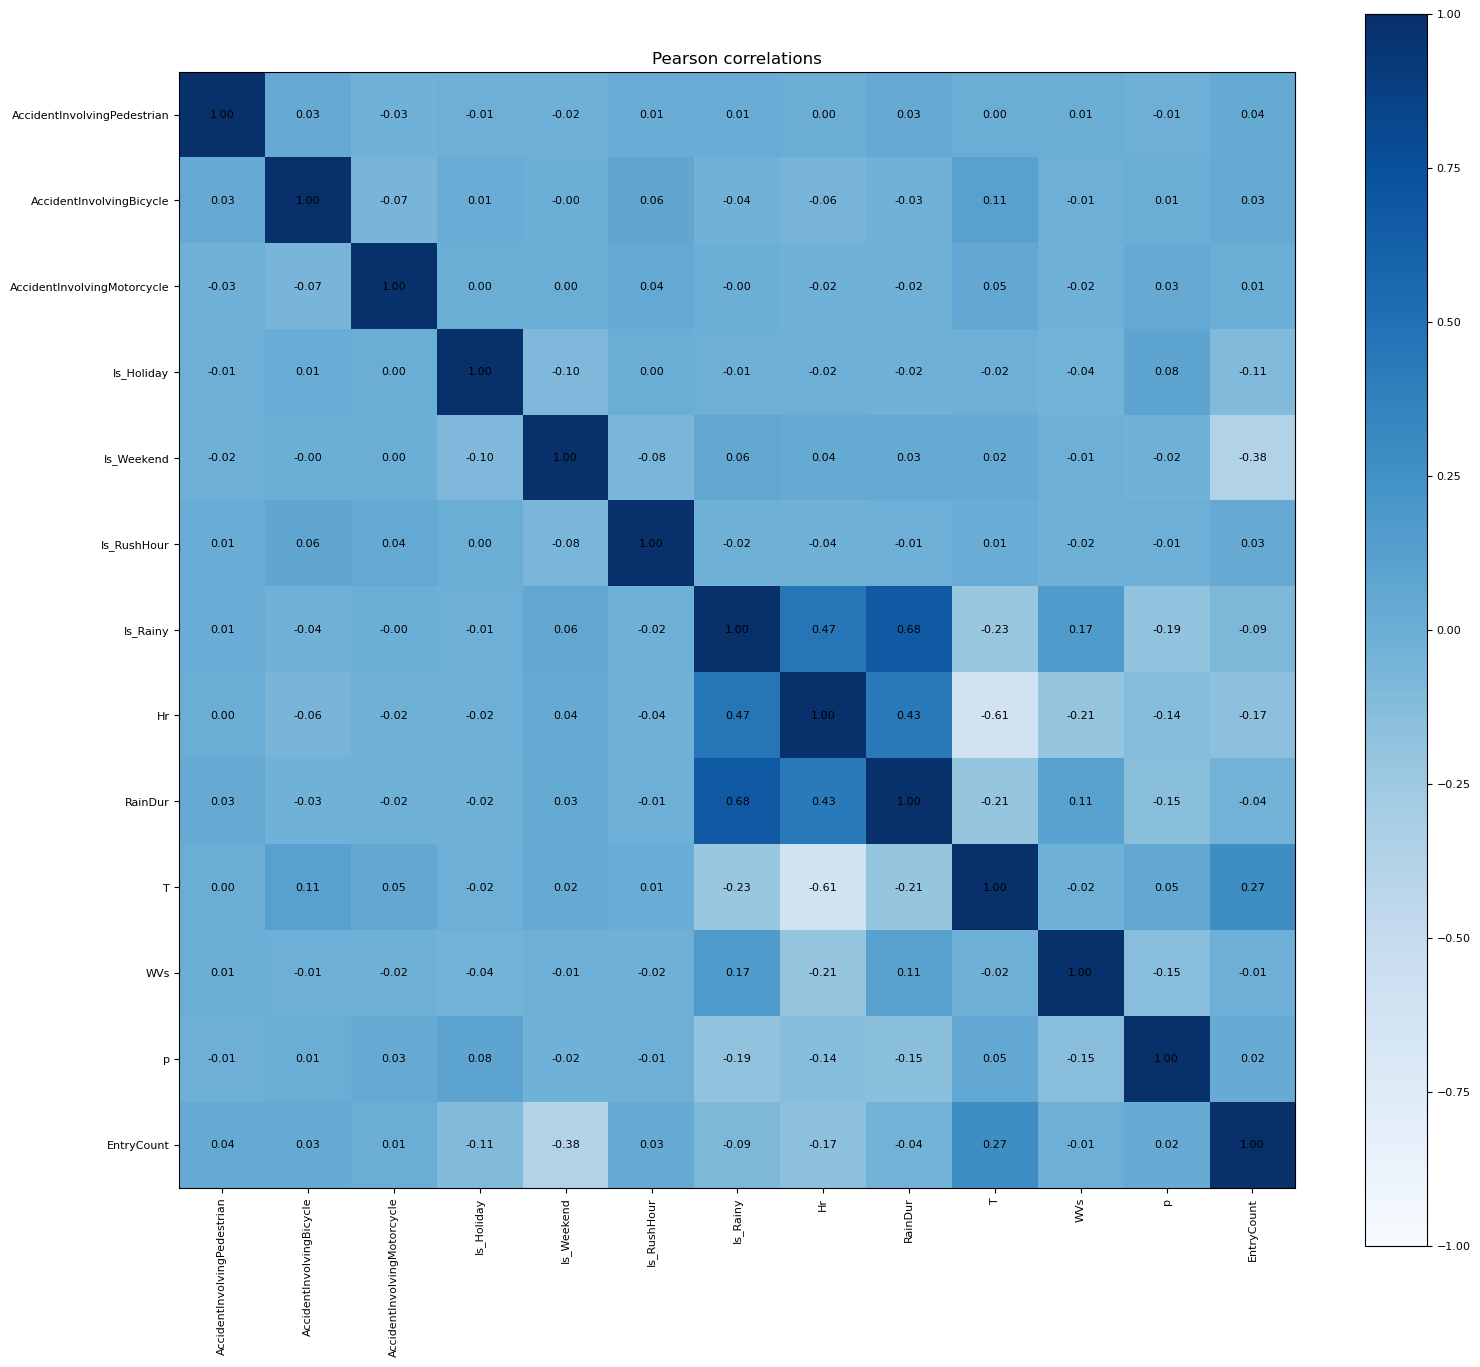

In [322]:
#%% Pearson correlation and plot

#Pearson's
pearson_matrix = df_select.corr(method = 'pearson')

# Pearson's plot
# Initiating a fig and axis object
fig, ax = plt.subplots(figsize=(18, 16))
# Create a plot
cax = ax.imshow(pearson_matrix.values, interpolation='nearest', cmap='Blues', vmin=-1, vmax=1)
# Set axis tick labels
ax.set_xticks(ticks=range(len(pearson_matrix.columns)))
ax.set_xticklabels(pearson_matrix.columns, rotation=90)
ax.set_yticks(ticks=range(len(pearson_matrix.columns)))
ax.set_yticklabels(pearson_matrix.columns)
# Resize the tick parameters
ax.tick_params(axis="both", labelsize=8)
# Adding a color bar
fig.colorbar(cax).ax.tick_params(labelsize=8)
# Add annotation
for (x, y), t in np.ndenumerate(pearson_matrix):
    ax.text(y, x, "{:.2f}".format(t), ha='center', va='center', fontsize=8)

plt.title('Pearson correlations')
plt.show()

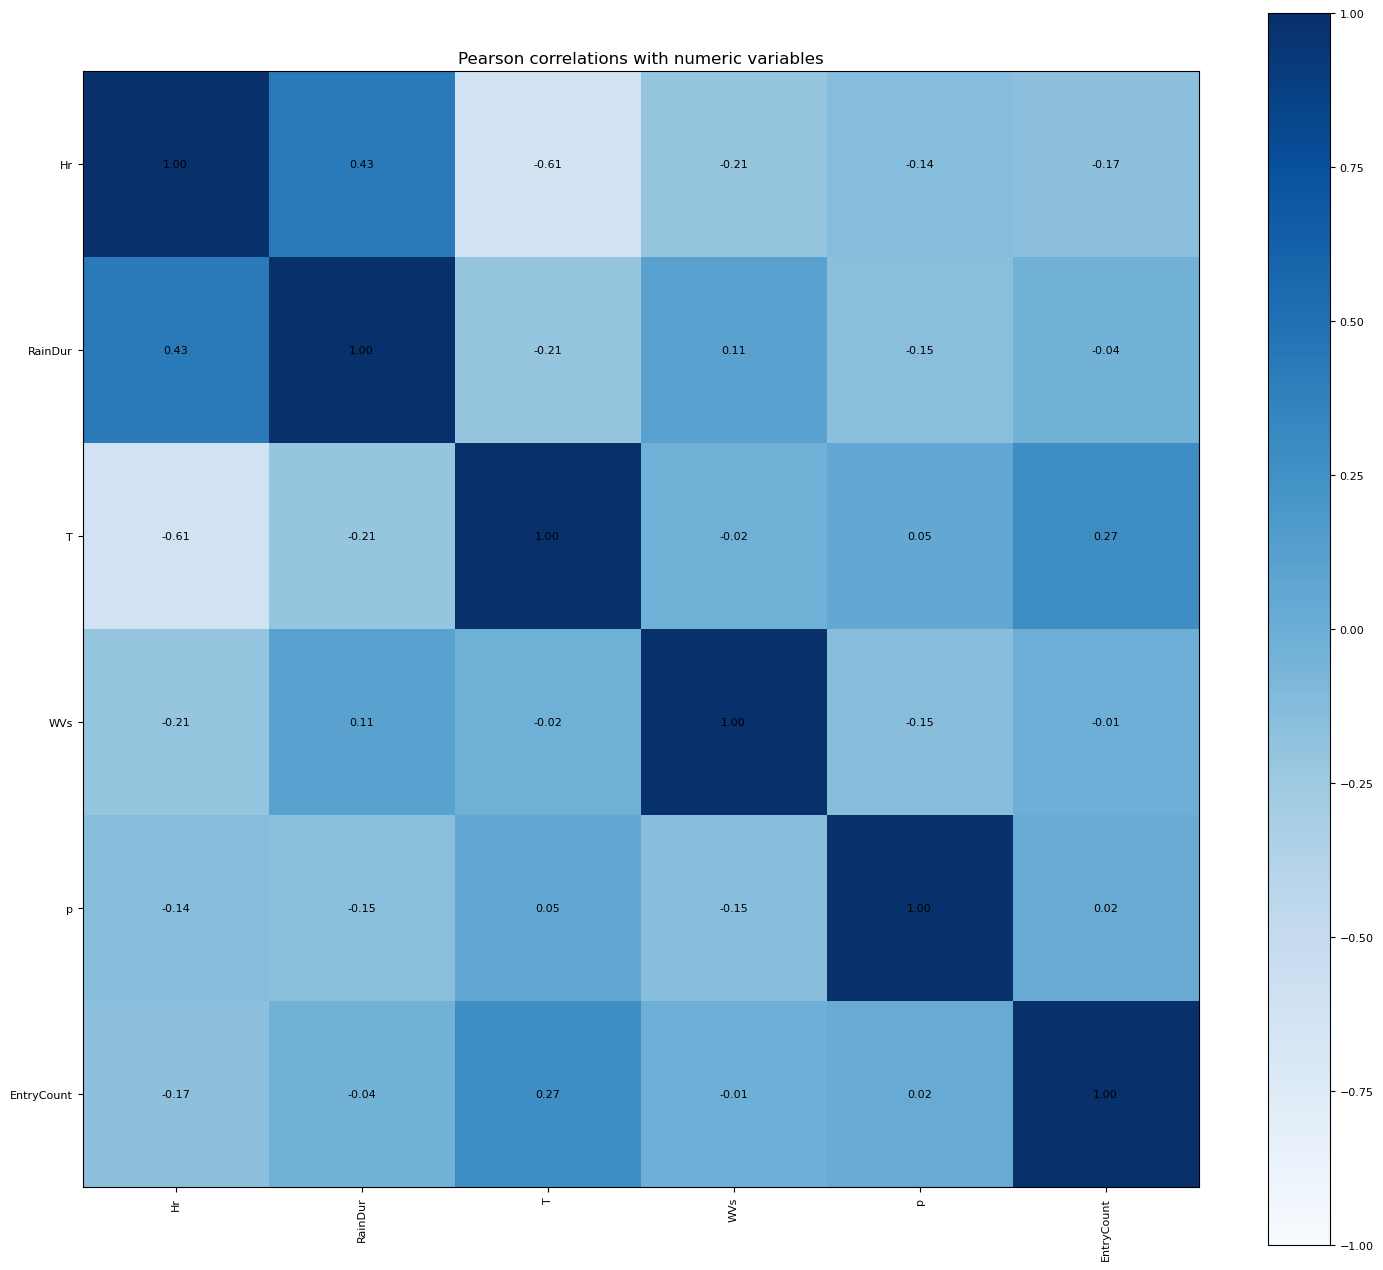

In [323]:
# Select only numeric variables for Pearson correlation
numeric_variables = df_select.select_dtypes(include=[np.number])

# Compute Pearson correlation matrix
pearson_matrix = numeric_variables.corr(method='pearson')

# Plot Pearson correlation matrix
fig, ax = plt.subplots(figsize=(18, 16))
cax = ax.imshow(pearson_matrix.values, interpolation='nearest', cmap='Blues', vmin=-1, vmax=1)
ax.set_xticks(ticks=range(len(pearson_matrix.columns)))
ax.set_xticklabels(pearson_matrix.columns, rotation=90)
ax.set_yticks(ticks=range(len(pearson_matrix.columns)))
ax.set_yticklabels(pearson_matrix.columns)
ax.tick_params(axis="both", labelsize=8)
fig.colorbar(cax).ax.tick_params(labelsize=8)
for (x, y), t in np.ndenumerate(pearson_matrix):
    ax.text(y, x, "{:.2f}".format(t), ha='center', va='center', fontsize=8)

plt.title('Pearson correlations with numeric variables')
plt.show()


### Spearman correlation

for measuring the monotonic relationship between variables, capturing both linear and nonlinear associations

/var/folders/l7/g63rznns6fncws3rg8cq5lz00000gn/T/ipykernel_92064/3066800133.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spearman_matrix = df_select.corr(method='spearman')


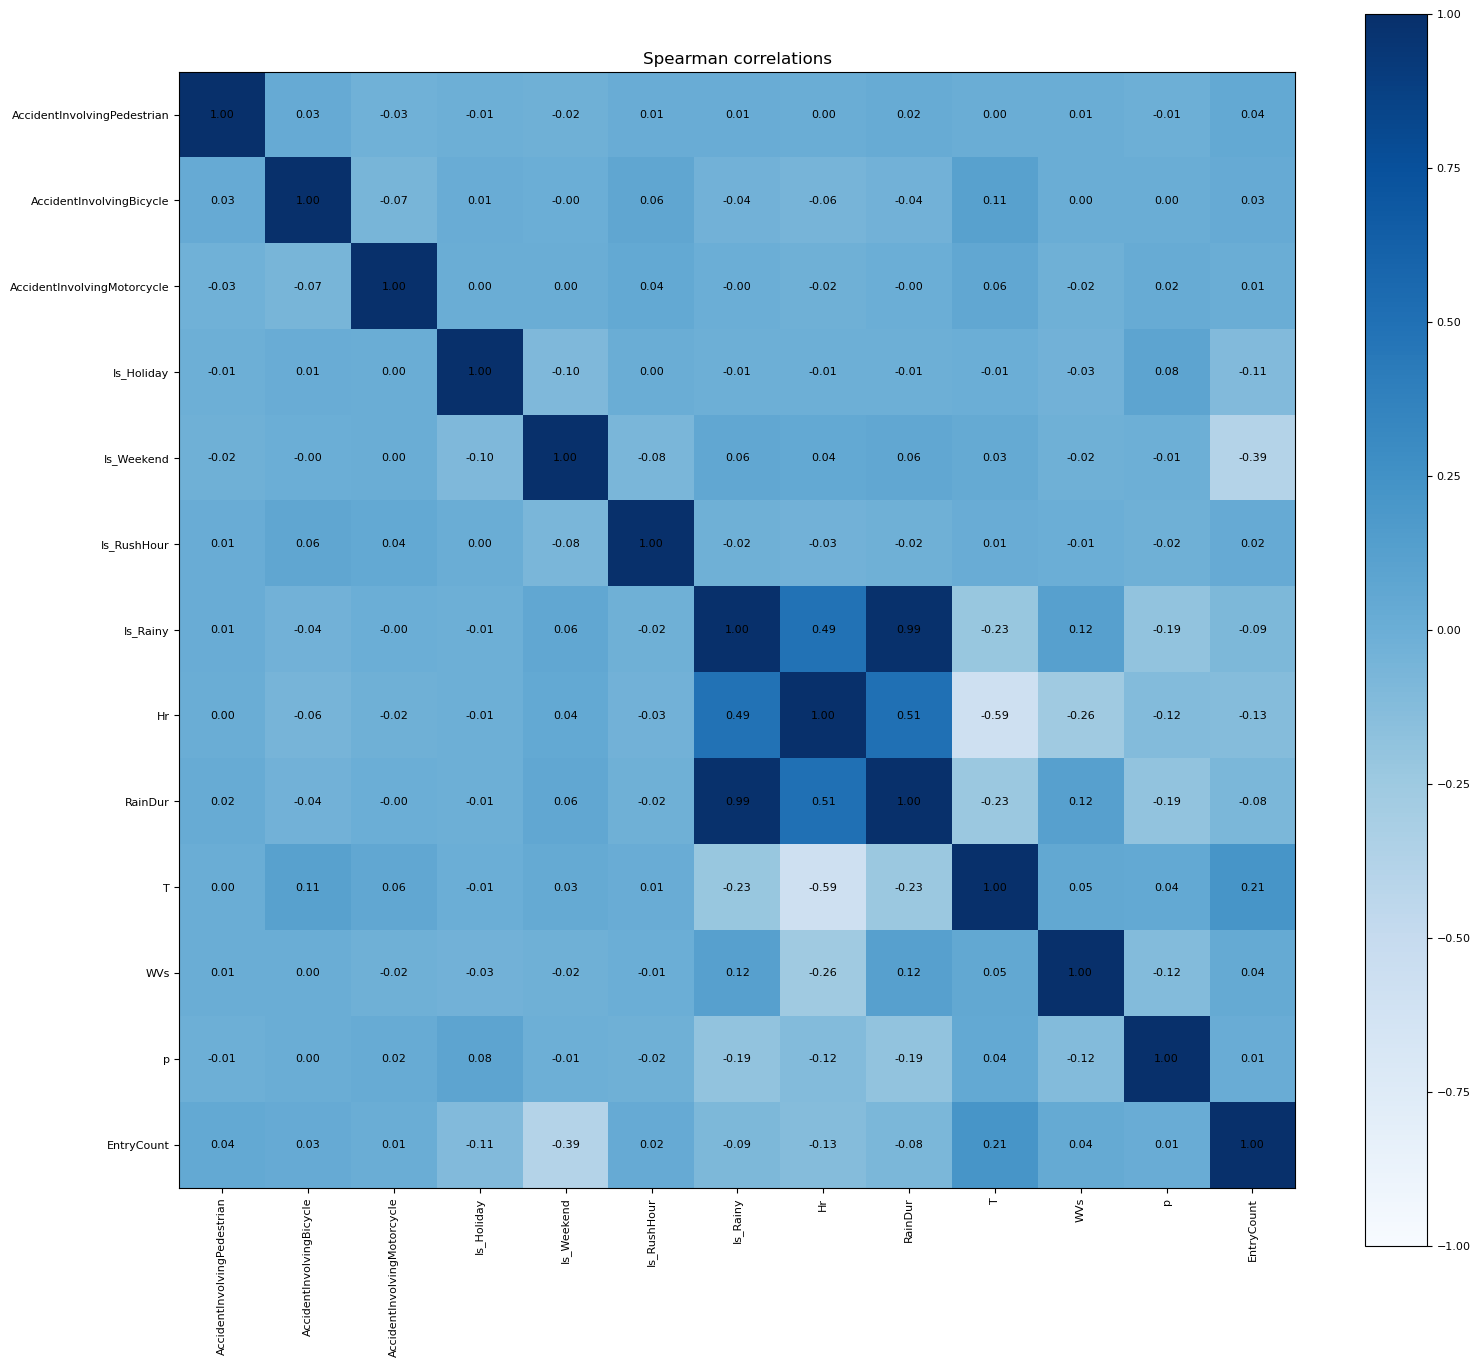

In [324]:
#%% Spearman correlation for nonlinear associations
spearman_matrix = df_select.corr(method='spearman')

# Spearman's plot
# Initiating a fig and axis object
fig, ax = plt.subplots(figsize=(18, 16))
# Create a plot
cax = ax.imshow(spearman_matrix.values, interpolation='nearest', cmap='Blues', vmin=-1, vmax=1)
# Set axis tick labels
ax.set_xticks(ticks=range(len(spearman_matrix.columns)))
ax.set_xticklabels(spearman_matrix.columns, rotation=90)
ax.set_yticks(ticks=range(len(spearman_matrix.columns)))
ax.set_yticklabels(spearman_matrix.columns)
# Resize the tick parameters
ax.tick_params(axis="both", labelsize=8)
# Adding a color bar
fig.colorbar(cax).ax.tick_params(labelsize=8)
# Add annotation
for (x, y), t in np.ndenumerate(spearman_matrix):
    ax.text(y, x, "{:.2f}".format(t), ha='center', va='center', fontsize=8)

plt.title('Spearman correlations')
plt.show()

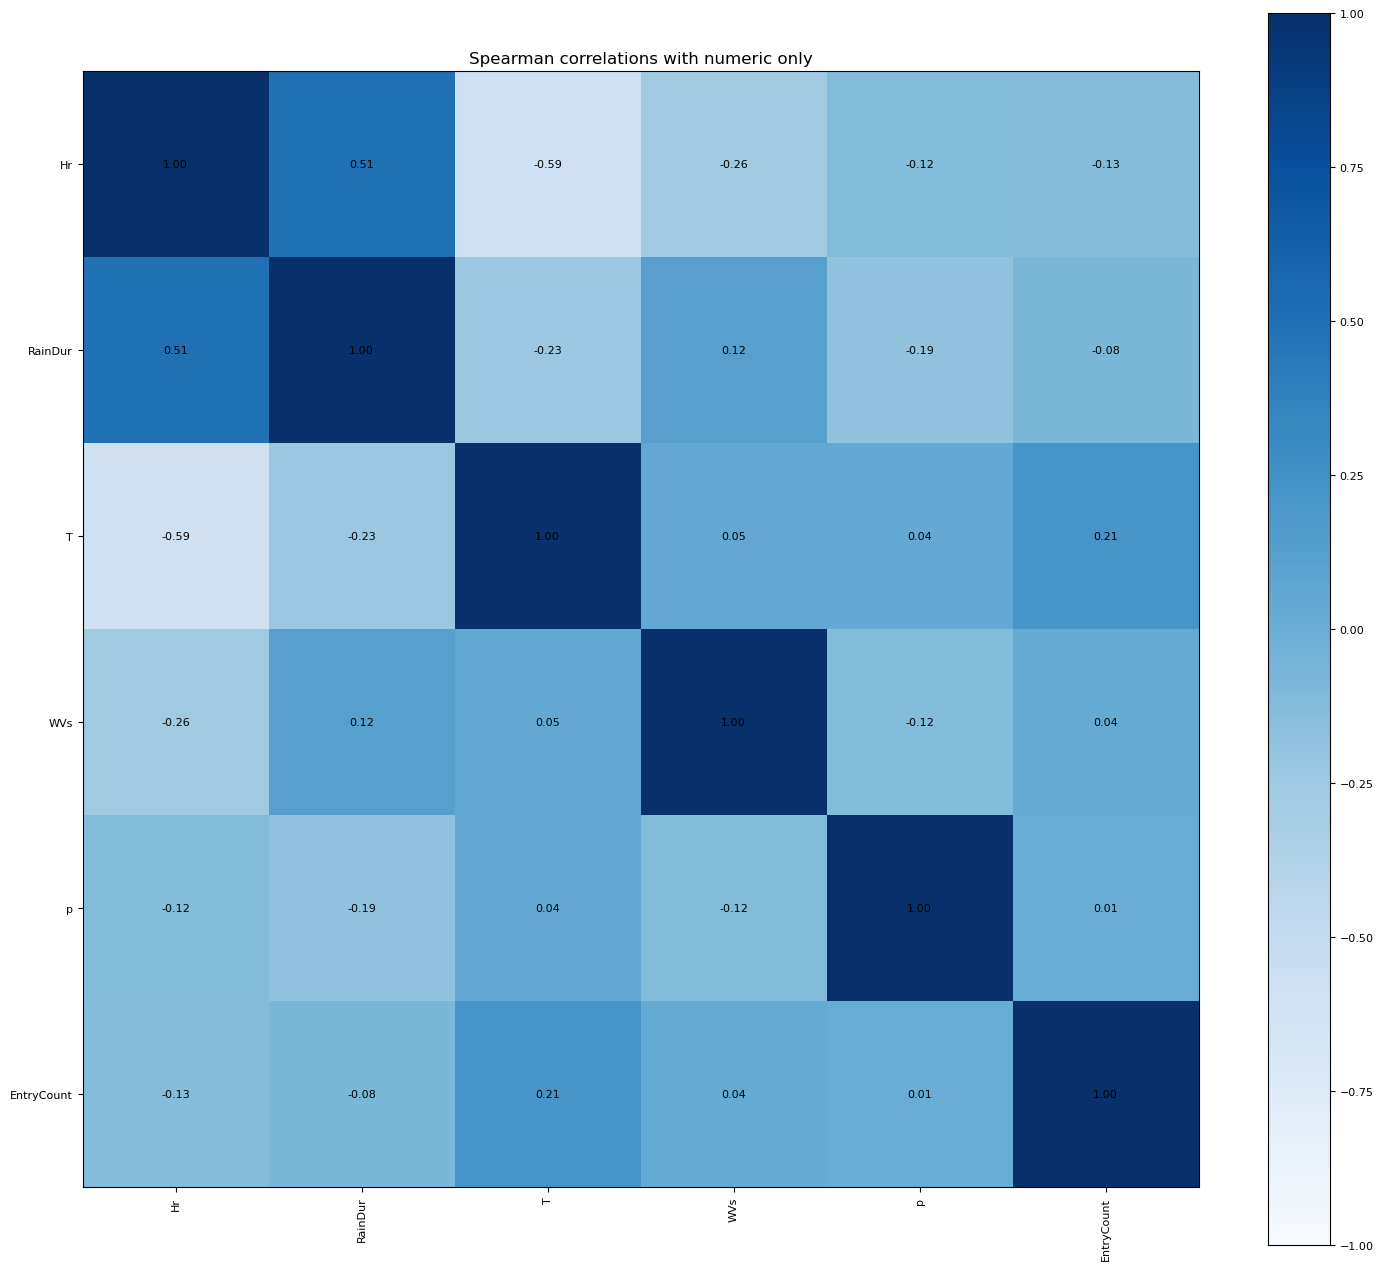

In [325]:
# Select only numeric variables for Spearman correlation
numeric_variables = df_select.select_dtypes(include=[np.number])

# Compute Spearman correlation matrix
spearman_matrix = numeric_variables.corr(method='spearman')

# Plot Spearman correlation matrix
fig, ax = plt.subplots(figsize=(18, 16))
cax = ax.imshow(spearman_matrix.values, interpolation='nearest', cmap='Blues', vmin=-1, vmax=1)
ax.set_xticks(ticks=range(len(spearman_matrix.columns)))
ax.set_xticklabels(spearman_matrix.columns, rotation=90)
ax.set_yticks(ticks=range(len(spearman_matrix.columns)))
ax.set_yticklabels(spearman_matrix.columns)
ax.tick_params(axis="both", labelsize=8)
fig.colorbar(cax).ax.tick_params(labelsize=8)
for (x, y), t in np.ndenumerate(spearman_matrix):
    ax.text(y, x, "{:.2f}".format(t), ha='center', va='center', fontsize=8)

plt.title('Spearman correlations with numeric only')
plt.show()


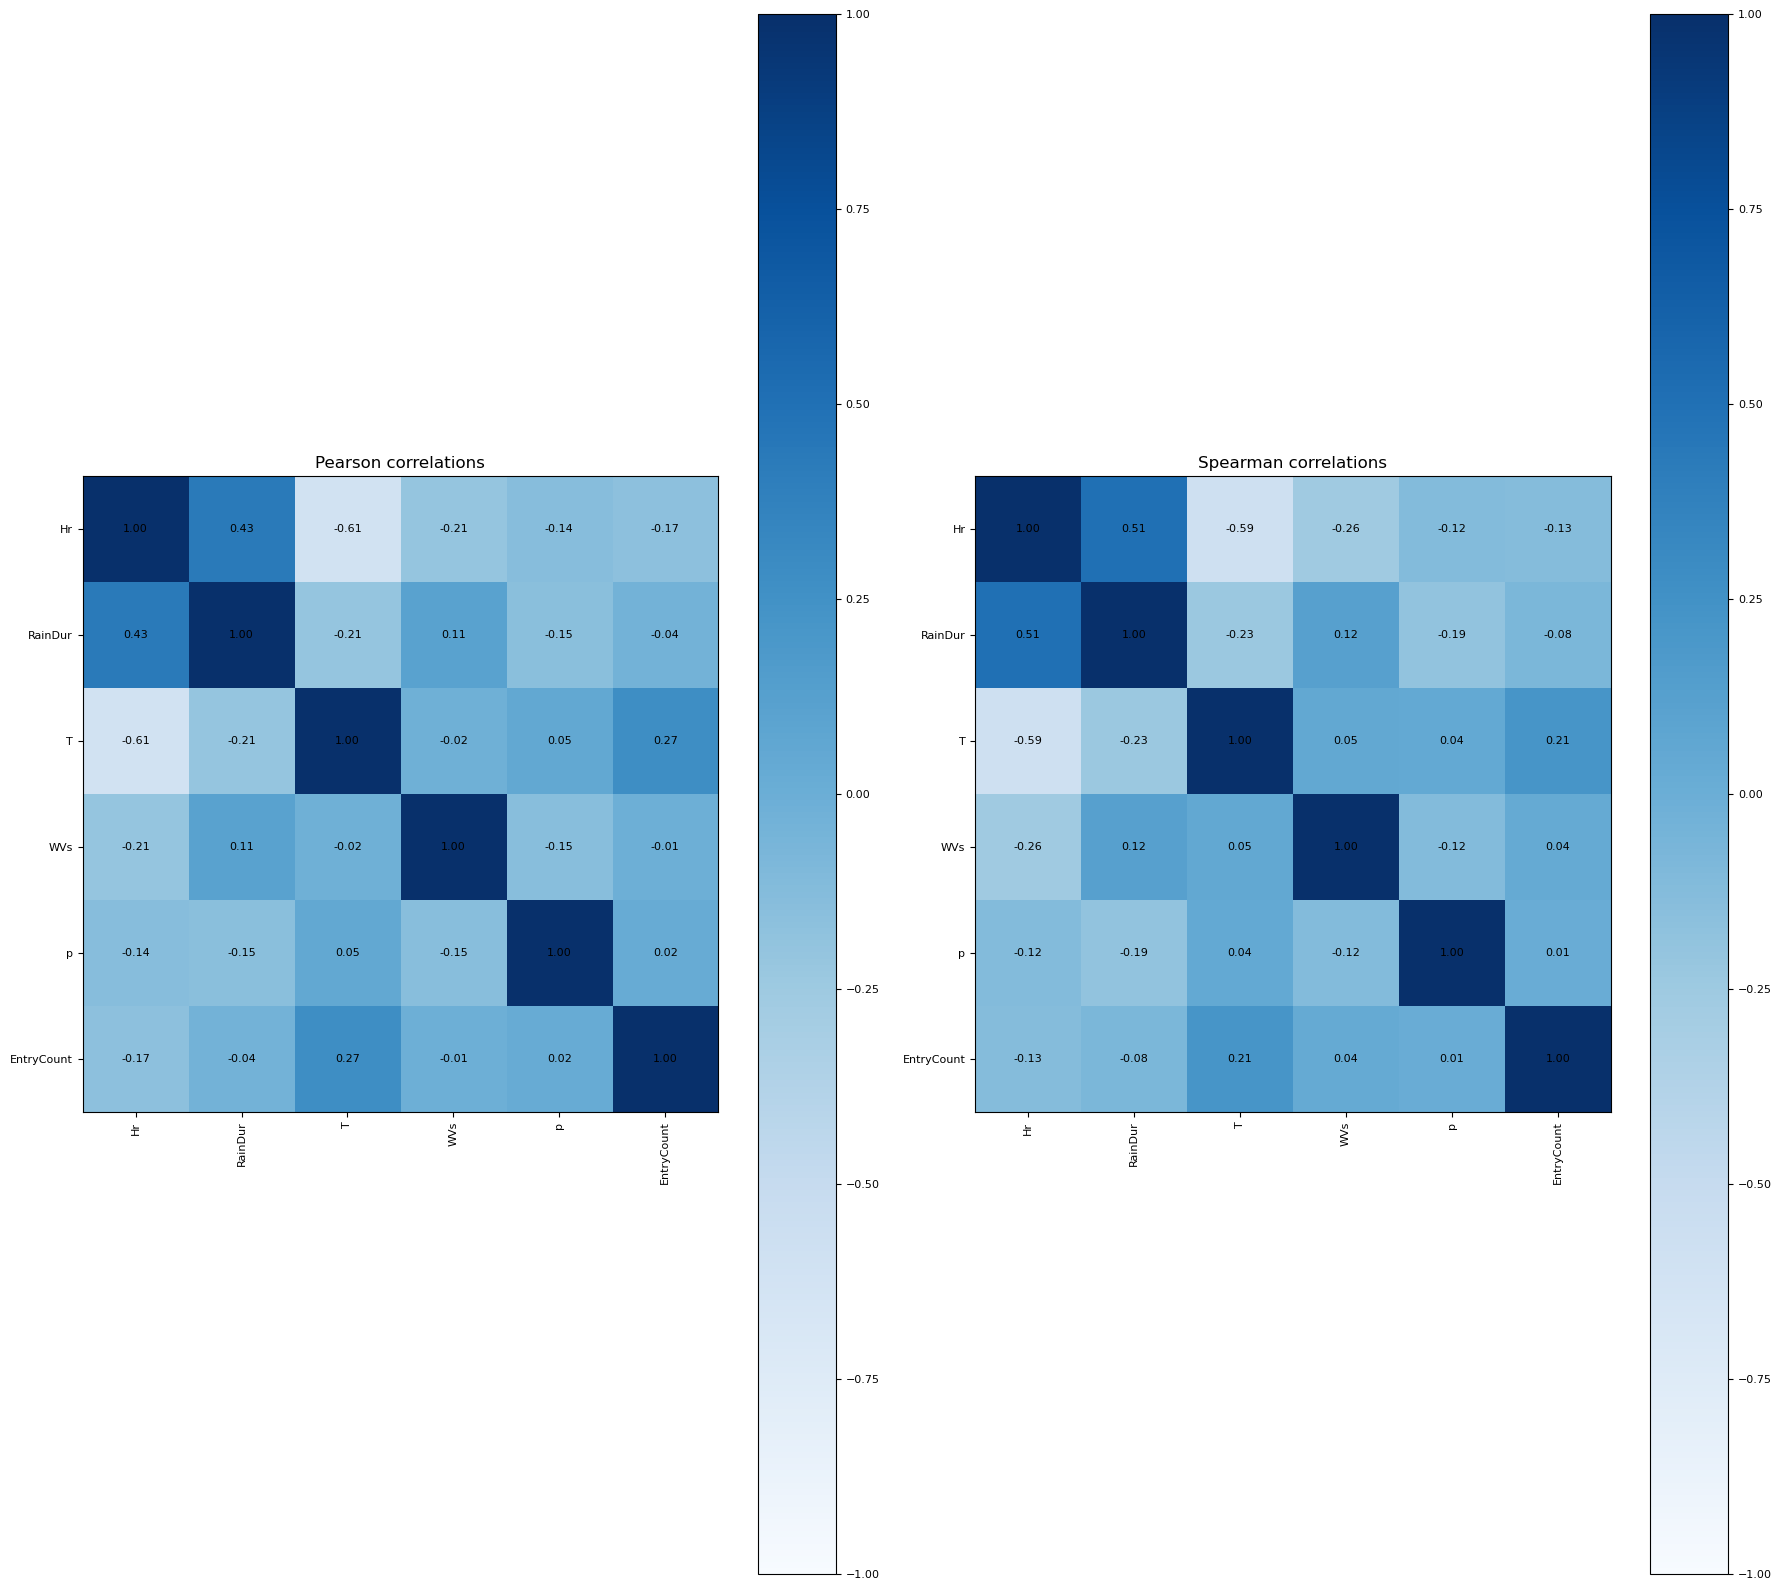

In [326]:
#Pearson and Spearman numeric side by side

# Select only numeric variables for Pearson correlation
numeric_variables = df_select.select_dtypes(include=[np.number])

# Compute Pearson correlation matrix
pearson_matrix = numeric_variables.corr(method='pearson')

# Plot Pearson correlation matrix
fig, axes = plt.subplots(figsize=(18, 16), ncols=2)
cax1 = axes[0].imshow(pearson_matrix.values, interpolation='nearest', cmap='Blues', vmin=-1, vmax=1)
axes[0].set_xticks(ticks=range(len(pearson_matrix.columns)))
axes[0].set_xticklabels(pearson_matrix.columns, rotation=90)
axes[0].set_yticks(ticks=range(len(pearson_matrix.columns)))
axes[0].set_yticklabels(pearson_matrix.columns)
axes[0].tick_params(axis="both", labelsize=8)
fig.colorbar(cax1, ax=axes[0]).ax.tick_params(labelsize=8)
for (x, y), t in np.ndenumerate(pearson_matrix):
    axes[0].text(y, x, "{:.2f}".format(t), ha='center', va='center', fontsize=8)
axes[0].set_title('Pearson correlations')

# Select only numeric variables for Spearman correlation
numeric_variables = df_select.select_dtypes(include=[np.number])

# Compute Spearman correlation matrix
spearman_matrix = numeric_variables.corr(method='spearman')

# Plot Spearman correlation matrix
cax2 = axes[1].imshow(spearman_matrix.values, interpolation='nearest', cmap='Blues', vmin=-1, vmax=1)
axes[1].set_xticks(ticks=range(len(spearman_matrix.columns)))
axes[1].set_xticklabels(spearman_matrix.columns, rotation=90)
axes[1].set_yticks(ticks=range(len(spearman_matrix.columns)))
axes[1].set_yticklabels(spearman_matrix.columns)
axes[1].tick_params(axis="both", labelsize=8)
fig.colorbar(cax2, ax=axes[1]).ax.tick_params(labelsize=8)
for (x, y), t in np.ndenumerate(spearman_matrix):
    axes[1].text(y, x, "{:.2f}".format(t), ha='center', va='center', fontsize=8)
axes[1].set_title('Spearman correlations')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


The number of accidents (EntryCount) show low positive correlation with temperature (T) and low negative correlation with humidity (Hr) in both models. However, these variables alone probably do not influence the accident counts.

### Cramer's V for association between categoricals

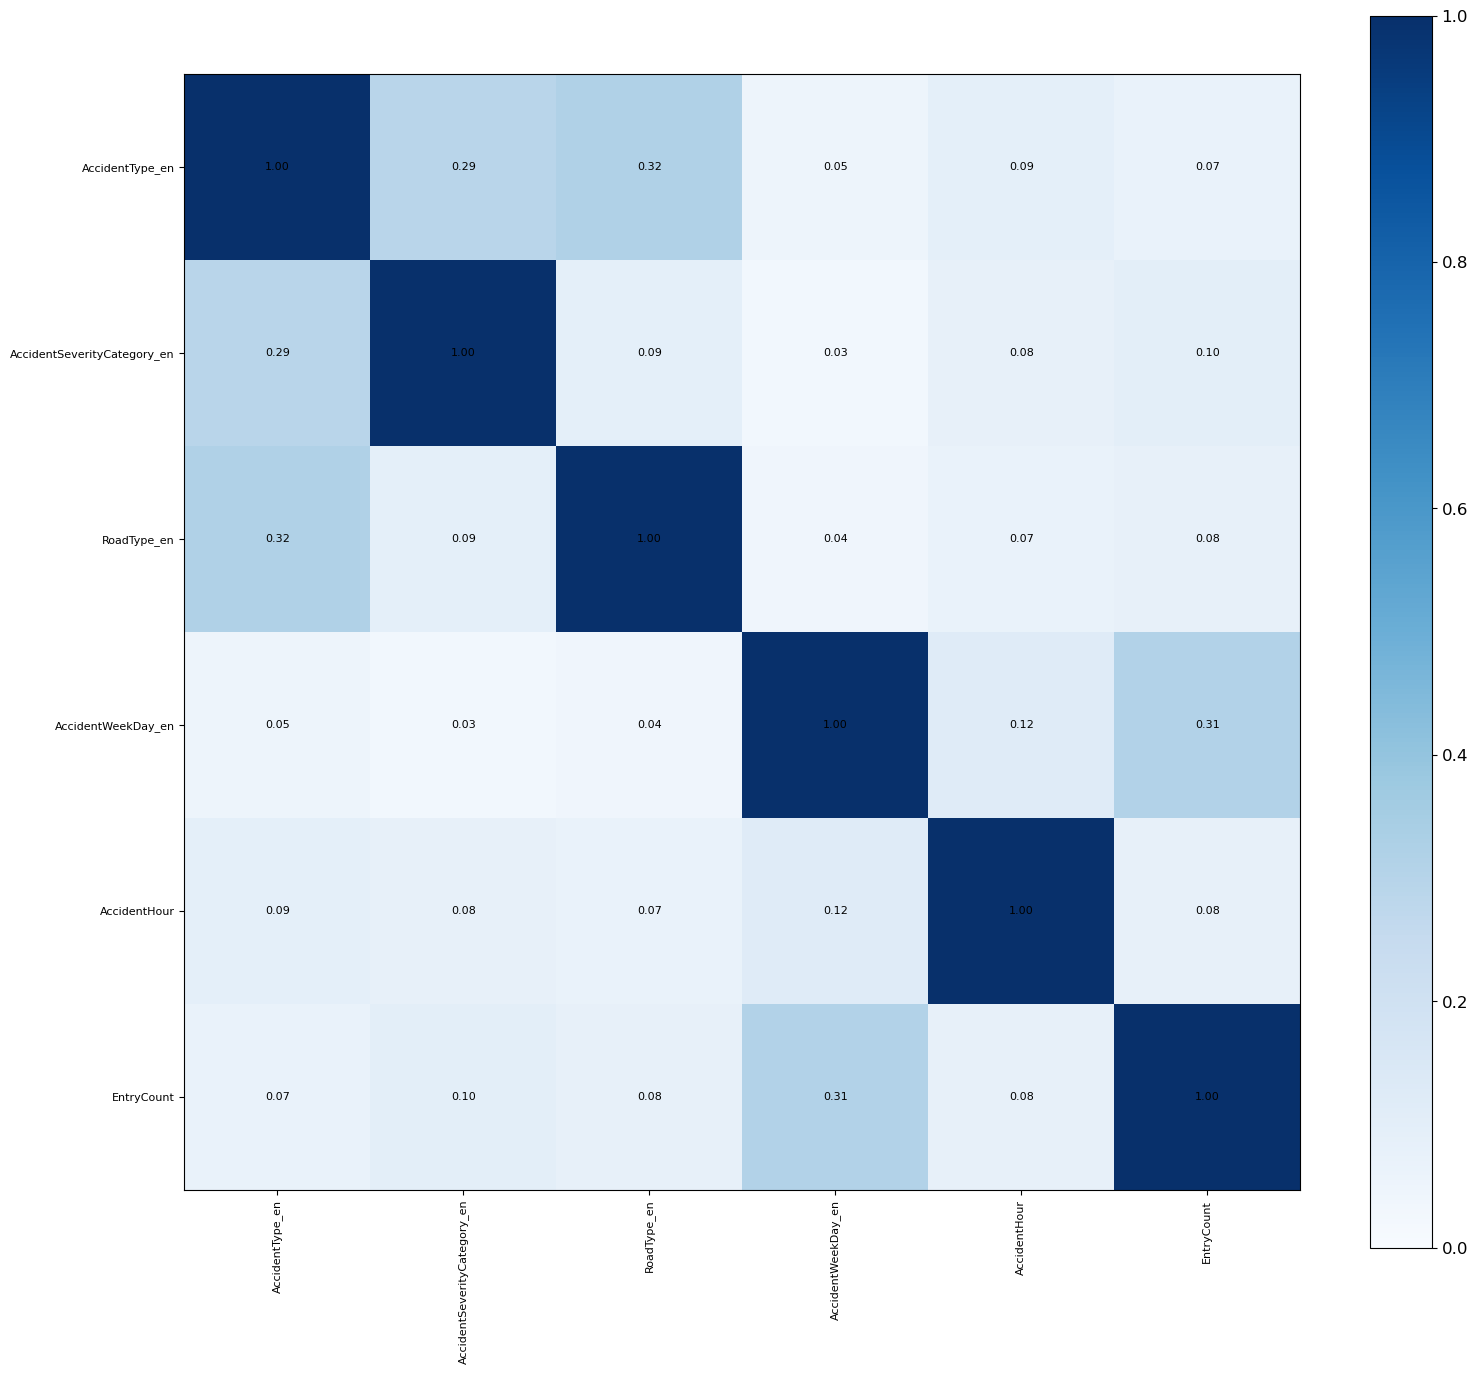

In [329]:
#%% Cramer’s V for categoricals

# Using association_metrics library
import association_metrics as am
# Select columns of Category type
selected_columns = ['AccidentType_en', 'AccidentSeverityCategory_en',
                 # 'AccidentInvolvingPedestrian', 'AccidentInvolvingBicycle', 'AccidentInvolvingMotorcycle',
                  'RoadType_en', 'AccidentWeekDay_en', 'AccidentHour',
                 # 'Is_Holiday', 'Is_Weekend', 'Is_RushHour', 'Is_Rainy',
                  'EntryCount']

# Convert selected columns to category data type
df_cramers = df_select[selected_columns].astype('category')
# Initialize a CramersV object using the pandas.DataFrame (df)
cramers_v = am.CramersV(df_cramers)
# It will return a pairwise matrix filled with Cramer's V, where 
# columns and index are the categorical variables of the passed     
cfit = cramers_v.fit().round(2)
cfit

# Instantiating a figure and axes object
fig, ax = plt.subplots(figsize = (18, 16))
# Generate a plot
cax = ax.imshow(cfit.values, interpolation='nearest', cmap='Blues', vmin=0, vmax=1)
# Step 3: Set axis tick labels
ax.set_xticks(ticks=range(len(cfit.columns)))
ax.set_xticklabels(cfit.columns, rotation=90)
ax.set_yticks(ticks=range(len(cfit.columns)))
ax.set_yticklabels(cfit.columns)
# Step 4: Resize the tick parameters
ax.tick_params(axis="both", labelsize=8)
# Adding a colorbar
fig.colorbar(cax).ax.tick_params(labelsize = 12)
# Adding annotations
for (x, y), t in np.ndenumerate(cfit):
    ax.annotate("{:.2f}".format(t),
                xy = (x, y),
                va = "center",
                ha = "center").set(color = "black", size = 8)



The number of accidents per day (EntryCount) shows positive correlation with weekdays (AccidentWeekDay_en), meaning that there is a relationship between the number of accidents happening and the days of the week. 

### Point-Biserial Correlation 
with https://towardsdatascience.com/point-biserial-correlation-with-python-f7cd591bd3b1

for measuring association between a continuous variable and a binary variable

In [328]:
#%% Calculate Point-Biserial Correlation (binary-continuous)

from scipy.stats import pointbiserialr

boolean_vars = ['Is_Holiday', 'Is_Weekend', 'Is_RushHour', 'Is_Rainy',
                'AccidentInvolvingPedestrian', 'AccidentInvolvingBicycle', 'AccidentInvolvingMotorcycle']
pbc_matrix = []

for var in boolean_vars:
    r, p = pointbiserialr(df_select[var], df_select['EntryCount'])
    pbc_matrix.append((var, r, p))

pbc_matrix = pd.DataFrame(pbc_matrix, columns=['Variable', 'Correlation', 'p-value'])

pbc_matrix


,Variable,Correlation,p-value
0,Is_Holiday,-0.112116,6.254155e-17
1,Is_Weekend,-0.375205,2.444551e-184
2,Is_RushHour,0.027028,4.448533e-02
3,Is_Rainy,-0.092663,5.096373e-12
4,AccidentInvolvingPedestrian,0.039037,3.697216e-03
5,AccidentInvolvingBicycle,0.032562,1.547397e-02
6,AccidentInvolvingMotorcycle,0.005023,7.088632e-01


A statistically significant negative correlation exists between the number of accidents (EntryCount) and weekends (Is_Weekend). This finding indicates a reduced association between accidents and weekends. Additionally, all other correlations, except for motorcycle involvement, exhibit small yet significant associations.

## OLS

with https://realpython.com/linear-regression-in-python/
from https://datatofish.com/multiple-linear-regression-python/

In [331]:
# with OLS
import pandas as pd
from sklearn import linear_model
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [368]:
# Check again for missing values
missing_rows = df_select[df_select.isnull().any(axis=1)]
print(missing_rows)

Empty DataFrame
Columns: [AccidentType_en, AccidentSeverityCategory_en, AccidentInvolvingPedestrian, AccidentInvolvingBicycle, AccidentInvolvingMotorcycle, RoadType_en, AccidentWeekDay_en, AccidentHour, Is_Holiday, Is_Weekend, Is_RushHour, Is_Rainy, Hr, RainDur, T, WVs, p, EntryCount]
Index: []


In [369]:
# View data types again
df_select.dtypes

AccidentType_en                category
AccidentSeverityCategory_en    category
AccidentInvolvingPedestrian        bool
AccidentInvolvingBicycle           bool
AccidentInvolvingMotorcycle        bool
RoadType_en                    category
AccidentWeekDay_en             category
AccidentHour                   category
Is_Holiday                         bool
Is_Weekend                         bool
Is_RushHour                        bool
Is_Rainy                           bool
Hr                              float64
RainDur                         float64
T                               float64
WVs                             float64
p                               float64
EntryCount                        int64
dtype: object

In [465]:
# Define the columns of interest
columns_of_interest = ['AccidentType_en', 'AccidentSeverityCategory_en',
                       'AccidentInvolvingPedestrian', 'AccidentInvolvingBicycle', 'AccidentInvolvingMotorcycle',
                       'RoadType_en', 'AccidentWeekDay_en', 'AccidentHour',
                       'Is_Holiday', 'Is_Weekend', 'Is_RushHour', 'Is_Rainy',
                       'Hr', 'RainDur', 'T', 'WVs', 'p']

In [466]:
# Extract the columns of interest from the DataFrame
df_regression = df_select[columns_of_interest]

In [468]:
# Perform one-hot encoding for categorical variables
df_encoded = pd.get_dummies(df_regression, drop_first=True)

In [489]:
# Handle missing values by imputation
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df_encoded)

In [492]:
# Create the feature matrix X and target variable y
X = X[:, :-1]  # Exclude the target variable from the feature matrix
y = df_select['EntryCount'].values

In [493]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [494]:
# Fit the linear regression model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [495]:
# Make predictions on the test set
y_pred = regr.predict(X_test)

In [496]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

In [497]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 21.458133154954343


In [498]:
# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

R-squared: 0.23745332761914228


In this case, a higher MSE indicates that the model's predictions have a larger deviation from the actual values, suggesting that the model might not fit the data well.

The R-squared value indicates that approximately 23.7% of the variance in the dependent variable (EntryCount) can be explained by the independent variables included in the model.

## LASSO

with https://machinelearningmastery.com/lasso-regression-with-python/

In [518]:
from sklearn.linear_model import Lasso

In [519]:
# Create the Lasso regression model
lasso = Lasso(alpha=0.1)  # Set the regularization parameter alpha

In [520]:
# Fit the Lasso regression model
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [521]:
# Predict on the test set
y_pred = lasso.predict(X_test)

In [522]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 21.759441329904124
R-squared: 0.2267458935422847


The MSE for the model's predictions on the number of accidents per day (EntryCount) can be considered relatively high given the range of the target variable and its inherent variability.

The R-squared value suggests that approximately 22.7% of the total variance in the number of accidents can be explained by the independent variables included in the model. This indicates that the selected predictors have a limited ability to account for the observed variation in the dependent variable.

These findings imply that additional factors or variables not captured in the model may play a significant role in explaining the variability in the number of accidents. For that, a grid search follows.

### LASSO with grid search

In [527]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define the alpha values to be tested
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

# Create the Lasso regression model
lasso = Lasso()

# Perform grid search
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(lasso, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best alpha and best model
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

# Fit the best model
best_model.fit(X_train, y_train)

# Print the best alpha and best model
print("Best Alpha:", best_alpha)
print("Best Model:", best_model)

# Evaluate the model
mse = np.mean((best_model.predict(X_test) - y_test) ** 2)
print("Mean Squared Error:", mse)


Best Alpha: 0.01
Best Model: Lasso(alpha=0.01)
Mean Squared Error: 21.152200153478002


The grid search using Lasso regularization with an optimal alpha value of 0.01 has yielded the best model. 

The MSE for this model indicates the average squared difference between the predicted and actual values of the dependent variable.

This indicates that the model's predictive performance in estimating the number of accidents per day (EntryCount) is still subject to some level of error. The value of MSE suggests that there is variability in the model's predictions, which may be attributed to unaccounted factors or inherent complexity in the relationship between the predictors and the dependent variable.

Nevertheless, the selection of Lasso regularization with an optimal alpha value allows for the selection of relevant predictors. The chosen model is expected to represent the underlying relationships in the most accurate manner considering the available data.

## Manual models
### Short model 1: weather conditions only

In [558]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Create the feature matrix X and target variable y
X_short1 = df_encoded[['Is_Rainy', 'RainDur', 'T', 'WVs']]
y = df_select['EntryCount']


# Create an instance of LinearRegression
model = LinearRegression()

# Fit the model
model.fit(X_short1, y)

# Get the predicted values
y_pred = model.predict(X_short1)

# Calculate mean squared error
mse = mean_squared_error(y, y_pred)

# Calculate R-squared
r2 = r2_score(y, y_pred)

# Retrieve the coefficients and column names
coefficients = model.coef_
column_names = X_short1.columns

# Create a DataFrame to store the coefficients
coefficients_df = pd.DataFrame({'Variable': column_names, 'Coefficient': coefficients})

# Print the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Coefficients:")
print(coefficients_df)


Mean Squared Error: 27.26368653405824
R-squared: 0.07881977229844028
Coefficients:
   Variable  Coefficient
0  Is_Rainy    -0.981040
1   RainDur     0.025502
2         T     0.176260
3       WVs    -0.008950


The MSE of 27.264, indicating the average squared difference between the predicted and actual values, still very high compared to the range of daily addicents. The R-squared value suggests that approximately 7.9% of the variance in the dependent variable can be explained by the independent variables. 

The coefficients reveal that rainy conditions (Is_Rainy) are associated with a decrease in the number of accidents (EntryCount), with each unit increase in rainfall resulting in a decrease of approximately 0.981 accidents. Additionally, a longer rainfall duration (RainDur) and higher temperature (T) are associated with a slight increase in the number of accidents, with coefficients of approximately 0.026 and 0.176, respectively. Scalar wind velocity (WVs) has a negligible impact on the number of accidents, as indicated by its coefficient of approximately -0.009.

### Short model 2: holiday, weekend and rush hour

In [559]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Create the feature matrix X and target variable y
X_short2 = df_encoded[['Is_Holiday', 'Is_Weekend', 'Is_RushHour']]
y = df_select['EntryCount']


# Create an instance of LinearRegression
model = LinearRegression()

# Fit the model
model.fit(X_short2, y)

# Get the predicted values
y_pred = model.predict(X_short2)

# Calculate mean squared error
mse = mean_squared_error(y, y_pred)

# Calculate R-squared
r2 = r2_score(y, y_pred)

# Retrieve the coefficients and column names
coefficients = model.coef_
column_names = X_short2.columns

# Create a DataFrame to store the coefficients
coefficients_df = pd.DataFrame({'Variable': column_names, 'Coefficient': coefficients})

# Print the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Coefficients:")
print(coefficients_df)


Mean Squared Error: 24.77726935246936
R-squared: 0.16283036061839706
Coefficients:
      Variable  Coefficient
0   Is_Holiday    -4.687023
1   Is_Weekend    -5.108858
2  Is_RushHour    -0.025903


This short linear regression model shows a MSE of 24.777, indicating the average squared difference between predicted and actual values, still very high considering the range of accidents per day. The R-squared value indicates that approximately 16.3% of the variance in the dependent variable can be explained by the independent variables. 

The coefficients suggest that being a holiday and weekend are associated with a decrease in the number of accidents (EntryCount), while being in a rush hour period has a slight negative impact.

### Long model: weather conditions, weekend, holidays and rush hour

In [560]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Create the feature matrix X and target variable y
X_long = df_encoded[['Is_Rainy', 'RainDur', 'T', 'WVs',
               'Is_Holiday', 'Is_Weekend', 'Is_RushHour']]
y = df_select['EntryCount']


# Create an instance of LinearRegression
model = LinearRegression()

# Fit the model
model.fit(X_long, y)

# Get the predicted values
y_pred = model.predict(X_long)

# Calculate mean squared error
mse = mean_squared_error(y, y_pred)

# Calculate R-squared
r2 = r2_score(y, y_pred)

# Retrieve the coefficients and column names
coefficients = model.coef_
column_names = X_long.columns

# Create a DataFrame to store the coefficients
coefficients_df = pd.DataFrame({'Variable': column_names, 'Coefficient': coefficients})

# Print the results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Coefficients:")
print(coefficients_df)


Mean Squared Error: 22.35620890849723
R-squared: 0.24463268798419346
Coefficients:
      Variable  Coefficient
0     Is_Rainy    -0.583431
1      RainDur     0.023285
2            T     0.184566
3          WVs    -0.131906
4   Is_Holiday    -4.575486
5   Is_Weekend    -5.193525
6  Is_RushHour    -0.083800


The MSE of 22.356 is still quite high considering the range of the target variable.
The R-squared value suggests that approximately 24.5% of the variance in the dependent variable (EntryCount) can be explained by the independent variables.
The significant coefficients are as follows:
Raining (Is_Rainy), holidays (Is_Holiday), weekends (Is_Weekend), rush hour (Is_RushHour) and decreasing scalar wind speed (WVs) are associated with a decrease in EntryCount.
Increasing rain duration(RainDur) and temperature (T) are associated with an increase in EntryCount.


### SUMMARY

Based on the given information, we can make the following inferences:

1. Weather Conditions: Factors such as longer rainfall duration (RainDur) and higher temperature (T) have a slight positive impact on accident occurrence. However, wind velocity (WVs) does not appear to have a significant effect on accident frequency.

2. Weekends and Holidays: Accidents are less likely to happen on weekends (Is_Weekend) and holidays (Is_Holiday). The coefficients for these variables indicate a negative impact, suggesting that accidents occur less frequently on weekends and holidays compared to regular weekdays.

3. Rush Hours: The variable Is_RushHour, which indicates whether an accident occurred during rush hours, has a negligible impact on accident frequency. The coefficient suggests that accidents during rush hours have a slight negative association with the number of accidents, but the effect is not significant.

In summary, weather conditions, weekends, and holidays have an impact on road accidents. Longer rainfall duration and higher temperature slightly increase accident occurrence. Weekends and holidays are associated with fewer accidents, whereas rush hour does not seem to significantly affect accident frequency.